In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

from scipy import stats
from scipy.stats import skew
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime as dt


from scipy.stats.mstats import normaltest

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Define palette
pal = ["#274D60","#6BA3BE","#0C969C","#0A7075","#032F30", "#031716"]
cmap = ListedColormap(pal)
palette = pal

from matplotlib.colors import LinearSegmentedColormap
pal_1 = ["#032F30","#0A7075","#0C969C","#fff9e6","#ffebc6","#fcd997","#f5b971"]
palette_1 = pal_1

reversed_pal_1 = pal_1[::-1]

cmap_1 = LinearSegmentedColormap.from_list("reversed_blue_green_cmap", reversed_pal_1)

In [3]:
plt.rcParams['font.family'] = 'Times New Roman'

In [4]:
transaction_df=pd.read_csv('/Users/hominhtrung/Documents/Gi√°o Tr√¨nh - FTU2/NƒÉm 3/Ph√¢n t√≠ch d·ªØ li·ªáu/[PTDL] Final Project/transaction.csv', index_col=0)
customerdemographic_df=pd.read_csv('/Users/hominhtrung/Documents/Gi√°o Tr√¨nh - FTU2/NƒÉm 3/Ph√¢n t√≠ch d·ªØ li·ªáu/[PTDL] Final Project/customerdemographic.csv', index_col=0)
customeraddress_df=pd.read_csv('/Users/hominhtrung/Documents/Gi√°o Tr√¨nh - FTU2/NƒÉm 3/Ph√¢n t√≠ch d·ªØ li·ªáu/[PTDL] Final Project/customeraddress.csv', index_col=0)

# 1. Data Processing

In [5]:
customerdemographic_df.shape

(3912, 12)

In [6]:
customeraddress_df.shape

(3999, 6)

In [7]:
transaction_df.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25         False   
1               2           3         3120       2017-05-21          True   
2               3          37          402       2017-10-16         False   
3               4          88         3135       2017-08-31         False   
4               5          78          787       2017-10-01          True   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date  
0       71.49          53.62              2012-12-04  
1     2091.47         388.92              2014-03-05  
2     1793.43         248.82              1999-07-22  
3     1198.46         381.10              1998-12-18  
4     1765.30         709.48              2015-08-12

In [8]:
customerdemographic_df.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp  Female   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot    Unknown    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases         DOB               job_title  \
0                                   93  1953-10-12     Executive Secretary   
1                                   81  1980-12-16  Administrative Officer   
2                                   61  1954-01-20      Recruiting Manager   
3                                   33  1961-10-03                  Others   
4                                   56  1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator owns_car  tenure  
0                Health      Mass Customer                 No      Yes      11  
1    Financial Services      Mass Customer                 No      Yes      16  
2              Property      Mass Customer                 No      Yes      15  
3                    IT      Mass Customer                 No       No       7  
4                Others  Affluent Customer                 No      Yes       8

In [9]:
customerdemographic_df['tenure']

0       11
1       16
2       15
3        7
4        8
        ..
3994    14
3995    19
3996     1
3998    10
3999    11
Name: tenure, Length: 3912, dtype: int64

In [10]:
customeraddress_df.head()

customer_id              address  postcode state    country  \
0            1   060 Morning Avenue      2016   NSW  Australia   
1            2  6 Meadow Vale Court      2153   NSW  Australia   
2            4   0 Holy Cross Court      4211   QLD  Australia   
3            5  17979 Del Mar Point      2448   NSW  Australia   
4            6     9 Oakridge Court      3216   VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [11]:
customerdata = pd.merge(customerdemographic_df, customeraddress_df, how='inner', left_on='customer_id', right_on='customer_id')
fact_order_detail = pd.merge(transaction_df, customerdata, how='inner', left_on='customer_id', right_on='customer_id')

In [12]:
fact_order_detail

transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25         False   
1                   2           3         3120       2017-05-21          True   
2                   3          37          402       2017-10-16         False   
3                   4          88         3135       2017-08-31         False   
4                   5          78          787       2017-10-01          True   
...               ...         ...          ...              ...           ...   
19322           19996          51         1018       2017-06-24          True   
19323           19997          41          127       2017-11-09          True   
19324           19998          87         2284       2017-04-14          True   
19325           19999           6         2764       2017-07-03         False   
19326           20000          11         1144       2017-09-22          True   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19322     Approved      OHM Cycles     Standard          high       medium   
19323     Approved           Solex         Road        medium       medium   
19324     Approved      OHM Cycles     Standard        medium       medium   
19325     Approved      OHM Cycles     Standard          high       medium   
19326     Approved   Trek Bicycles     Standard        medium        small   

       ...  job_industry_category     wealth_segment deceased_indicator  \
0      ...     Financial Services      Mass Customer                 No   
1      ...                 Health      Mass Customer                 No   
2      ...                 Retail  Affluent Customer                 No   
3      ...     Financial Services      Mass Customer                 No   
4      ...                 Retail  Affluent Customer                 No   
...    ...                    ...                ...                ...   
19322  ...          Manufacturing      Mass Customer                 No   
19323  ...     Financial Services      Mass Customer                 No   
19324  ...     Telecommunications     High Net Worth                 No   
19325  ...     Financial Services      Mass Customer                 No   
19326  ...                 Health     High Net Worth                 No   

      owns_car tenure               address  postcode state    country  \
0          Yes     10     984 Hoepker Court      3064   VIC  Australia   
1          Yes     10       4 Shopko Circle      2196   NSW  Australia   
2           No     22    586 Miller Parkway      2835   NSW  Australia   
3           No     16   1617 Harper Parkway      2096   NSW  Australia   
4          Yes      2    0601 Stephen Place      2292   NSW  Australia   
...        ...    ...                   ...       ...   ...        ...   
19322      Yes      7         3 Hayes Court      3109   VIC  Australia   
19323       No     19    0 Pearson Crossing      4405   QLD  Australia   
19324       No     14  10055 Old Shore Lane      3630   VIC  Australia   
19325      Yes     20       1 Wayridge Park      4301   QLD  Australia   
19326      Yes      5      4439 7th Terrace      2177   NSW  Australia   

      property_valuation  
0                      6  
1                      5  
2                      1  
3                     10  
4                      7  
...                  ...  
19322                 10  
19323                  1  
19324                  1  
19325                  1  
19326     

In [13]:
fact_order_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19327 non-null  int64  
 1   product_id                           19327 non-null  int64  
 2   customer_id                          19327 non-null  int64  
 3   transaction_date                     19327 non-null  object 
 4   online_order                         19327 non-null  bool   
 5   order_status                         19327 non-null  object 
 6   brand                                19327 non-null  object 
 7   product_line                         19327 non-null  object 
 8   product_class                        19327 non-null  object 
 9   product_size                         19327 non-null  object 
 10  list_price                           19327 non-null  float64
 11  standard_cost               

In [14]:
fact_order_detail['transaction_id']=fact_order_detail['transaction_id'].astype('object')
fact_order_detail['product_id']=fact_order_detail['product_id'].astype('object')
fact_order_detail['customer_id']=fact_order_detail['customer_id'].astype('object')
fact_order_detail['transaction_date'] = pd.to_datetime(fact_order_detail['transaction_date'])
fact_order_detail['product_first_sold_date'] = pd.to_datetime(fact_order_detail['product_first_sold_date'])
fact_order_detail['DOB'] = pd.to_datetime(fact_order_detail['DOB'])

In [15]:
print(fact_order_detail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19327 non-null  object        
 1   product_id                           19327 non-null  object        
 2   customer_id                          19327 non-null  object        
 3   transaction_date                     19327 non-null  datetime64[ns]
 4   online_order                         19327 non-null  bool          
 5   order_status                         19327 non-null  object        
 6   brand                                19327 non-null  object        
 7   product_line                         19327 non-null  object        
 8   product_class                        19327 non-null  object        
 9   product_size                         19327 non-null  object        
 10  list_price

In [16]:
fact_order_detail.to_csv('fact_order_detail.csv')

In [17]:
fact_order_detail['profit'] = fact_order_detail['list_price'] - fact_order_detail['standard_cost']

In [18]:
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2017-12-31")
today_date=pd.to_datetime("2017-12-31")

In [19]:
fact_order_detail["customer_age"] = (end_date - fact_order_detail["DOB"]).dt.days // 365
fact_order_detail["customer_age"] = fact_order_detail["customer_age"].astype("Int64")

fact_order_detail = fact_order_detail[(fact_order_detail["customer_age"] >= 14) & (fact_order_detail["customer_age"] <= 100)]

fact_order_detail.customer_age.describe()

count      19327.0
mean     39.886894
std      12.612546
min           15.0
25%           30.0
50%           40.0
75%           49.0
max           86.0
Name: customer_age, dtype: Float64

In [20]:
customerdata['customer_id']=customerdata['customer_id'].astype('object')
customerdata['DOB'] = pd.to_datetime(customerdata['DOB'])

In [21]:
current_date = pd.to_datetime('2017-12-31')

customerdata['customer_age'] = current_date.year - customerdata['DOB'].dt.year

customerdata['customer_age'] -= ((current_date.month < customerdata['DOB'].dt.month) | 
                                  ((current_date.month == customerdata['DOB'].dt.month) & 
                                   (current_date.day < customerdata['DOB'].dt.day))).astype(int)


customerdata['customer_age'] = customerdata['customer_age'].astype("Int64")


customerdata = customerdata[(customerdata['customer_age'] >= 14) & (customerdata['customer_age'] <= 100)]


customerdata['customer_age'].describe()

count       3908.0
mean     39.932702
std      12.611533
min           15.0
25%           30.0
50%           40.0
75%           49.0
max           86.0
Name: customer_age, dtype: Float64

In [22]:
fact_order_detail["product_first_sold_date"] = pd.to_datetime(fact_order_detail["product_first_sold_date"], errors='coerce')
end_date = pd.to_datetime('2017-12-31')

fact_order_detail["product_age"] = (end_date - fact_order_detail["product_first_sold_date"]).dt.days // 365

fact_order_detail = fact_order_detail.dropna(subset=["product_age"])

fact_order_detail["product_age"].describe()


count    19327.000000
mean        12.944689
std          7.891881
min          1.000000
25%          6.000000
50%         13.000000
75%         20.000000
max         26.000000
Name: product_age, dtype: float64

In [23]:
fact_order_detail["profit"] = fact_order_detail["list_price"] - fact_order_detail["standard_cost"]

# Calculate recency
fact_order_detail["recency"] = (today_date - fact_order_detail["transaction_date"]).dt.days.astype("Int64")

# Calculate frequency

fact_order_detail["frequency"] = fact_order_detail.groupby("customer_id")["customer_id"].transform( "count")

In [24]:
fact_order_detail

transaction_id product_id customer_id transaction_date  online_order  \
0                  1          2        2950       2017-02-25         False   
1                  2          3        3120       2017-05-21          True   
2                  3         37         402       2017-10-16         False   
3                  4         88        3135       2017-08-31         False   
4                  5         78         787       2017-10-01          True   
...              ...        ...         ...              ...           ...   
19322          19996         51        1018       2017-06-24          True   
19323          19997         41         127       2017-11-09          True   
19324          19998         87        2284       2017-04-14          True   
19325          19999          6        2764       2017-07-03         False   
19326          20000         11        1144       2017-09-22          True   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19322     Approved      OHM Cycles     Standard          high       medium   
19323     Approved           Solex         Road        medium       medium   
19324     Approved      OHM Cycles     Standard        medium       medium   
19325     Approved      OHM Cycles     Standard          high       medium   
19326     Approved   Trek Bicycles     Standard        medium        small   

       ...               address  postcode state    country  \
0      ...     984 Hoepker Court      3064   VIC  Australia   
1      ...       4 Shopko Circle      2196   NSW  Australia   
2      ...    586 Miller Parkway      2835   NSW  Australia   
3      ...   1617 Harper Parkway      2096   NSW  Australia   
4      ...    0601 Stephen Place      2292   NSW  Australia   
...    ...                   ...       ...   ...        ...   
19322  ...         3 Hayes Court      3109   VIC  Australia   
19323  ...    0 Pearson Crossing      4405   QLD  Australia   
19324  ...  10055 Old Shore Lane      3630   VIC  Australia   
19325  ...       1 Wayridge Park      4301   QLD  Australia   
19326  ...      4439 7th Terrace      2177   NSW  Australia   

      property_valuation   profit  customer_age product_age recency frequency  
0                      6    17.87            63           5     309         3  
1                      5  1702.55            38           3     224         7  
2                      1  1544.61            40          18      76         6  
3                     10   817.36            56          19     122         7  
4                      7  1055.82            21           2      91        10  
...                  ...      ...           ...         ...     ...       ...  
19322                 10   802.26            23          14     190         5  
19323                  1   104.24            43          20      52        10  
19324                  1  1592.19            43           7     261         7  
19325                  1    91.15            62          13     181         3  
19326                  9   195.34            21          18     100         7  

[19327 rows x 34 columns]

In [25]:
fact_order_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19327 non-null  object        
 1   product_id                           19327 non-null  object        
 2   customer_id                          19327 non-null  object        
 3   transaction_date                     19327 non-null  datetime64[ns]
 4   online_order                         19327 non-null  bool          
 5   order_status                         19327 non-null  object        
 6   brand                                19327 non-null  object        
 7   product_line                         19327 non-null  object        
 8   product_class                        19327 non-null  object        
 9   product_size                         19327 non-null  object        
 10  list_price

In [26]:
fact_order_detail.groupby('brand').agg({'profit': lambda x: x.sum()})


profit
brand                     
Giant Bicycles  1536461.24
Norco Bicycles   839008.46
OHM Cycles      1443852.60
Solex           2358352.84
Trek Bicycles   1796860.46
WeareA2B        2668800.58

In [27]:
pivot_table = fact_order_detail.pivot_table(index='customer_id', columns='brand', values='profit', aggfunc='sum', fill_value=0)
pivot_table

brand        Giant Bicycles  Norco Bicycles  OHM Cycles    Solex  \
customer_id                                                        
1                   1708.37          165.85      185.70   768.89   
2                    448.68            0.00        0.00     0.00   
4                     41.13            0.00        0.00   179.44   
5                   1230.27          385.56        0.00   574.62   
6                   1113.55            0.00        0.00     0.00   
...                     ...             ...         ...      ...   
3496                   0.00          318.66        0.00  1612.25   
3497                1504.50            0.00        0.00   143.82   
3498                   0.00            0.00      456.45  1434.00   
3499                 880.01          167.21        0.00   616.90   
3500                 342.48            0.00      583.27    17.87   

brand        Trek Bicycles  WeareA2B  
customer_id                           
1                   189.28      0.00  
2                     0.00   1777.58  
4                     0.00      0.00  
5                    75.48    129.01  
6                   143.36   2689.64  
...                    ...       ...  
3496                114.93      0.00  
3497                  0.00      0.00  
3498                143.36   1113.52  
3499                  0.00   3291.13  
3500                  0.00    842.24  

[3412 rows x 6 columns]

In [28]:
# Generating the RFM Table
RfmTable = fact_order_detail.groupby("customer_id").agg(
    {
        "recency": lambda x: x.min(),
        "frequency": lambda x: x.count(),
        "profit": lambda x: x.sum(),
    }
)

RfmTable.rename(
    columns={
        "recency": "recency",
        "frequency": "frequency",
        "profit": "monetary",
    },
    inplace=True,
)

RfmTable.head()

recency  frequency  monetary
customer_id                              
1                  8         11   3018.09
2                129          3   2226.26
4                196          2    220.57
5                 17          6   2394.94
6                 65          5   3946.55

In [29]:
customerdata_=customerdata.merge(RfmTable, how = 'inner', on='customer_id')
customerdata_merge=customerdata_.merge(pivot_table, how = 'inner', on='customer_id')


In [30]:
customerdata_merge

customer_id      first_name     last_name  gender  \
0              1         Laraine     Medendorp  Female   
1              2             Eli       Bockman    Male   
2              4          Talbot       Unknown    Male   
3              5  Sheila-kathryn        Calton  Female   
4              6            Curr     Duckhouse    Male   
...          ...             ...           ...     ...   
3407        3496           Danya      Burnyeat    Male   
3408        3497            Thia         O'Day  Female   
3409        3498            Lois       Abrahim  Female   
3410        3499         Shelton  Tewkesberrie    Male   
3411        3500            Josy       Fleeman  Female   

      past_3_years_bike_related_purchases        DOB  \
0                                      93 1953-10-12   
1                                      81 1980-12-16   
2                                      33 1961-10-03   
3                                      56 1977-05-13   
4                                      35 1966-09-16   
...                                   ...        ...   
3407                                   99 1986-04-25   
3408                                   73 1986-05-03   
3409                                   28 1995-11-02   
3410                                   29 1979-06-17   
3411                                   71 1967-07-21   

                        job_title job_industry_category     wealth_segment  \
0             Executive Secretary                Health      Mass Customer   
1          Administrative Officer    Financial Services      Mass Customer   
2                          Others                    IT      Mass Customer   
3                   Senior Editor                Others  Affluent Customer   
4                          Others                Retail     High Net Worth   
...                           ...                   ...                ...   
3407                       Editor         Manufacturing      Mass Customer   
3408  Administrative Assistant IV         Manufacturing  Affluent Customer   
3409                       Others         Manufacturing      Mass Customer   
3410                       Others         Manufacturing      Mass Customer   
3411                       Others         Entertainment  Affluent Customer   

     deceased_indicator  ... customer_age  recency frequency  monetary  \
0                    No  ...           64        8        11   3018.09   
1                    No  ...           37      129         3   2226.26   
2                    No  ...           56      196         2    220.57   
3                    No  ...           40       17         6   2394.94   
4                    No  ...           51       65         5   3946.55   
...                 ...  ...          ...      ...       ...       ...   
3407                 No  ...           31      257         4   2045.84   
3408                 No  ...           31       53         3   1648.32   
3409                 No  ...           22      128         6   3147.33   
3410                 No  ...           38       52         7   4955.25   
3411                 No  ...           50      145         6   1785.86   

     Giant Bicycles Norco Bicycles  OHM Cycles    Solex  Trek Bicycles  \
0           1708.37         165.85      185.70   768.89         189.28   
1            448.68           0.00        0.00     0.00           0.00   
2             41.13           0.00        0.00   179.44           0.00   
3           1230.27         385.56        0.00   574.62          75.48   
4           1113.55           0.00        0.00     0.00         143.36   
...             ...            ...         ...      ...            ...   
3407           0.00         318.66        0.00  1612.25         114.93   
3408        1504.50           0.00        0.00   143.82           0.00   
3409           0.00           0.00      456.45  1434.00         143.36   
3410         880.01         167.21        0.00   616.90           0.0

In [31]:
customerdata_merge["tenure_valuation_mul"] = customerdata_merge["tenure"] * customerdata_merge["property_valuation"]
customerdata_merge["tenure_valuation_div"] = customerdata_merge["tenure"] / customerdata_merge["property_valuation"]

In [32]:
customerdata_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3412 non-null   object        
 1   first_name                           3412 non-null   object        
 2   last_name                            3412 non-null   object        
 3   gender                               3412 non-null   object        
 4   past_3_years_bike_related_purchases  3412 non-null   int64         
 5   DOB                                  3412 non-null   datetime64[ns]
 6   job_title                            3412 non-null   object        
 7   job_industry_category                3412 non-null   object        
 8   wealth_segment                       3412 non-null   object        
 9   deceased_indicator                   3412 non-null   object        
 10  owns_car    

# 2. PCA - Features Selection

In [33]:
customerdata_merge_df=customerdata_merge.copy()

In [34]:
# Hadeling Outlier
def replace_outliers_with_zscore(data, column):
    col_values = data[column]
    mean = np.mean(col_values)
    std = np.std(col_values)
    
    # Manual Z-score calculation
    z_scores = (col_values - mean) / std
    abs_z_scores = np.abs(z_scores)
    
    median = np.median(col_values)
    
    data[column] = np.where(abs_z_scores > 3, median, col_values)

numerical_columns = customerdata_merge_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    replace_outliers_with_zscore(customerdata_merge_df, col)

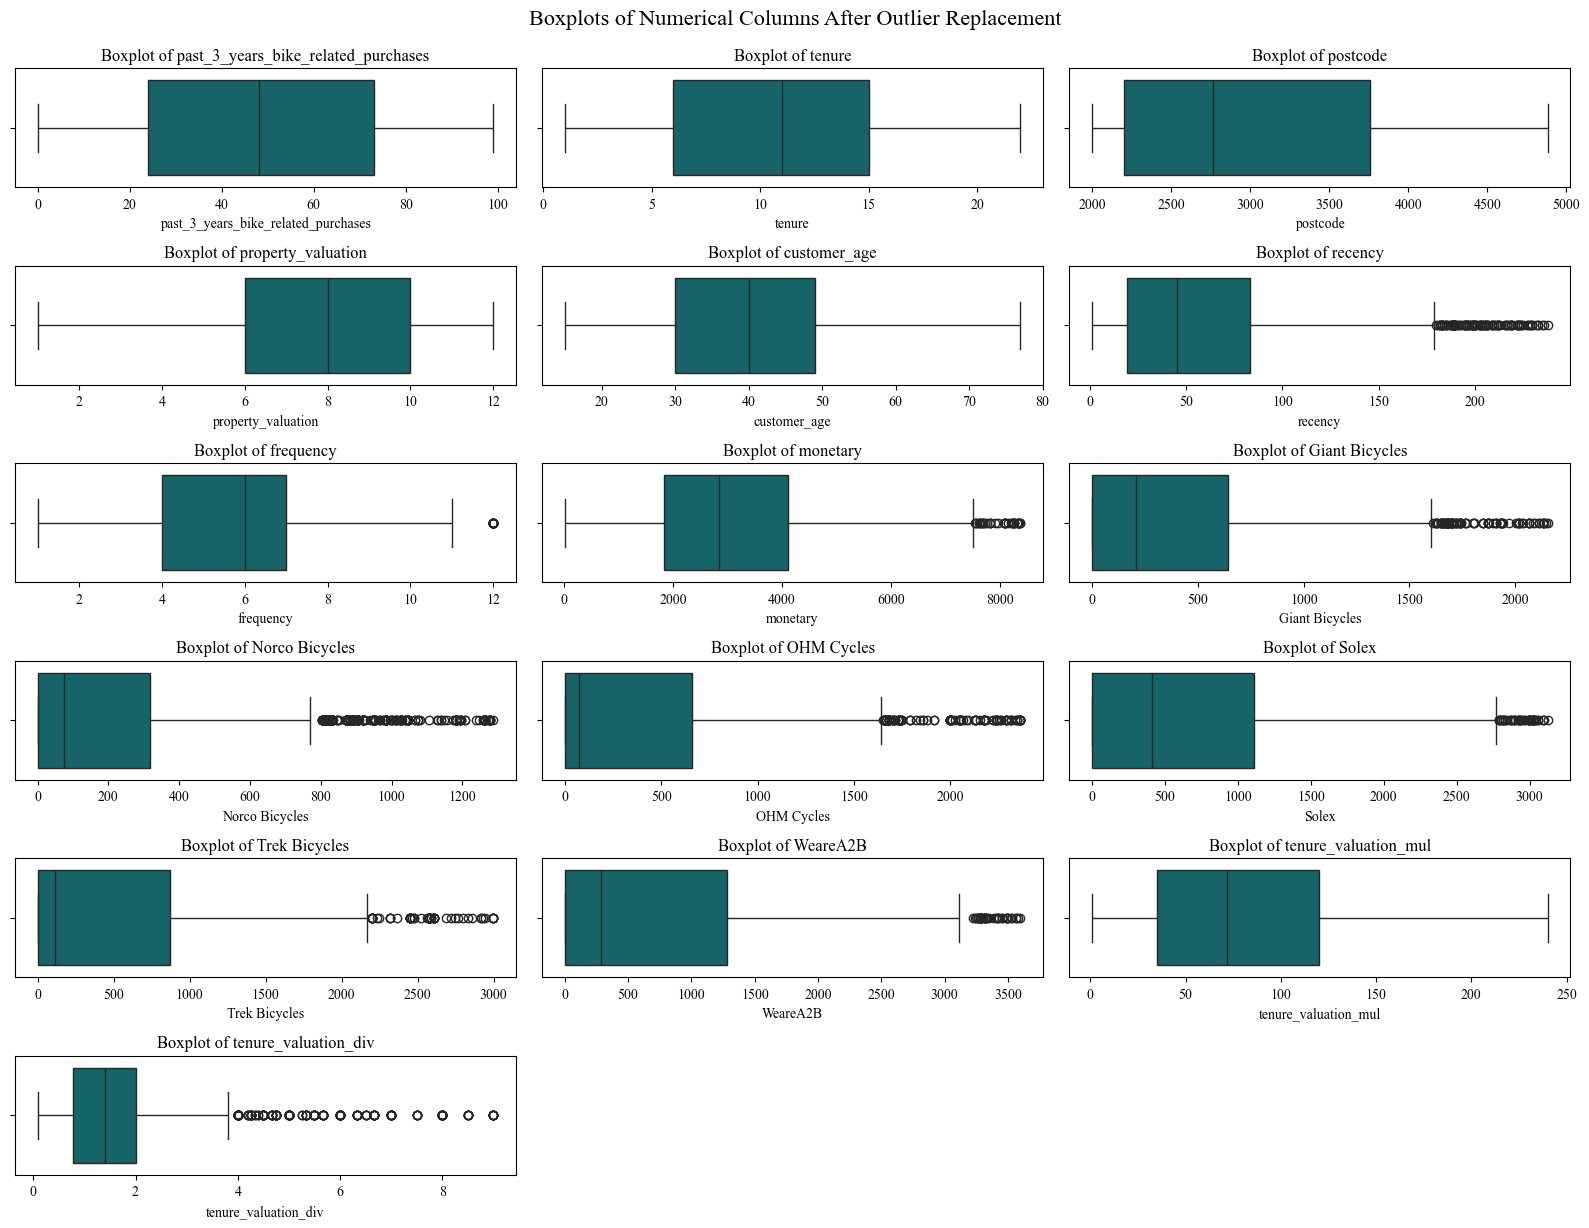

In [35]:
numerical_columns = customerdata_merge_df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_columns)
cols = 3  
rows = (num_cols + cols - 1) // cols  

plt.figure(figsize=(16, 2 * rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=customerdata_merge_df[col], color='#0A7075', orient='h')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.suptitle('Boxplots of Numerical Columns After Outlier Replacement', fontsize=16, y=1.02)
plt.show()

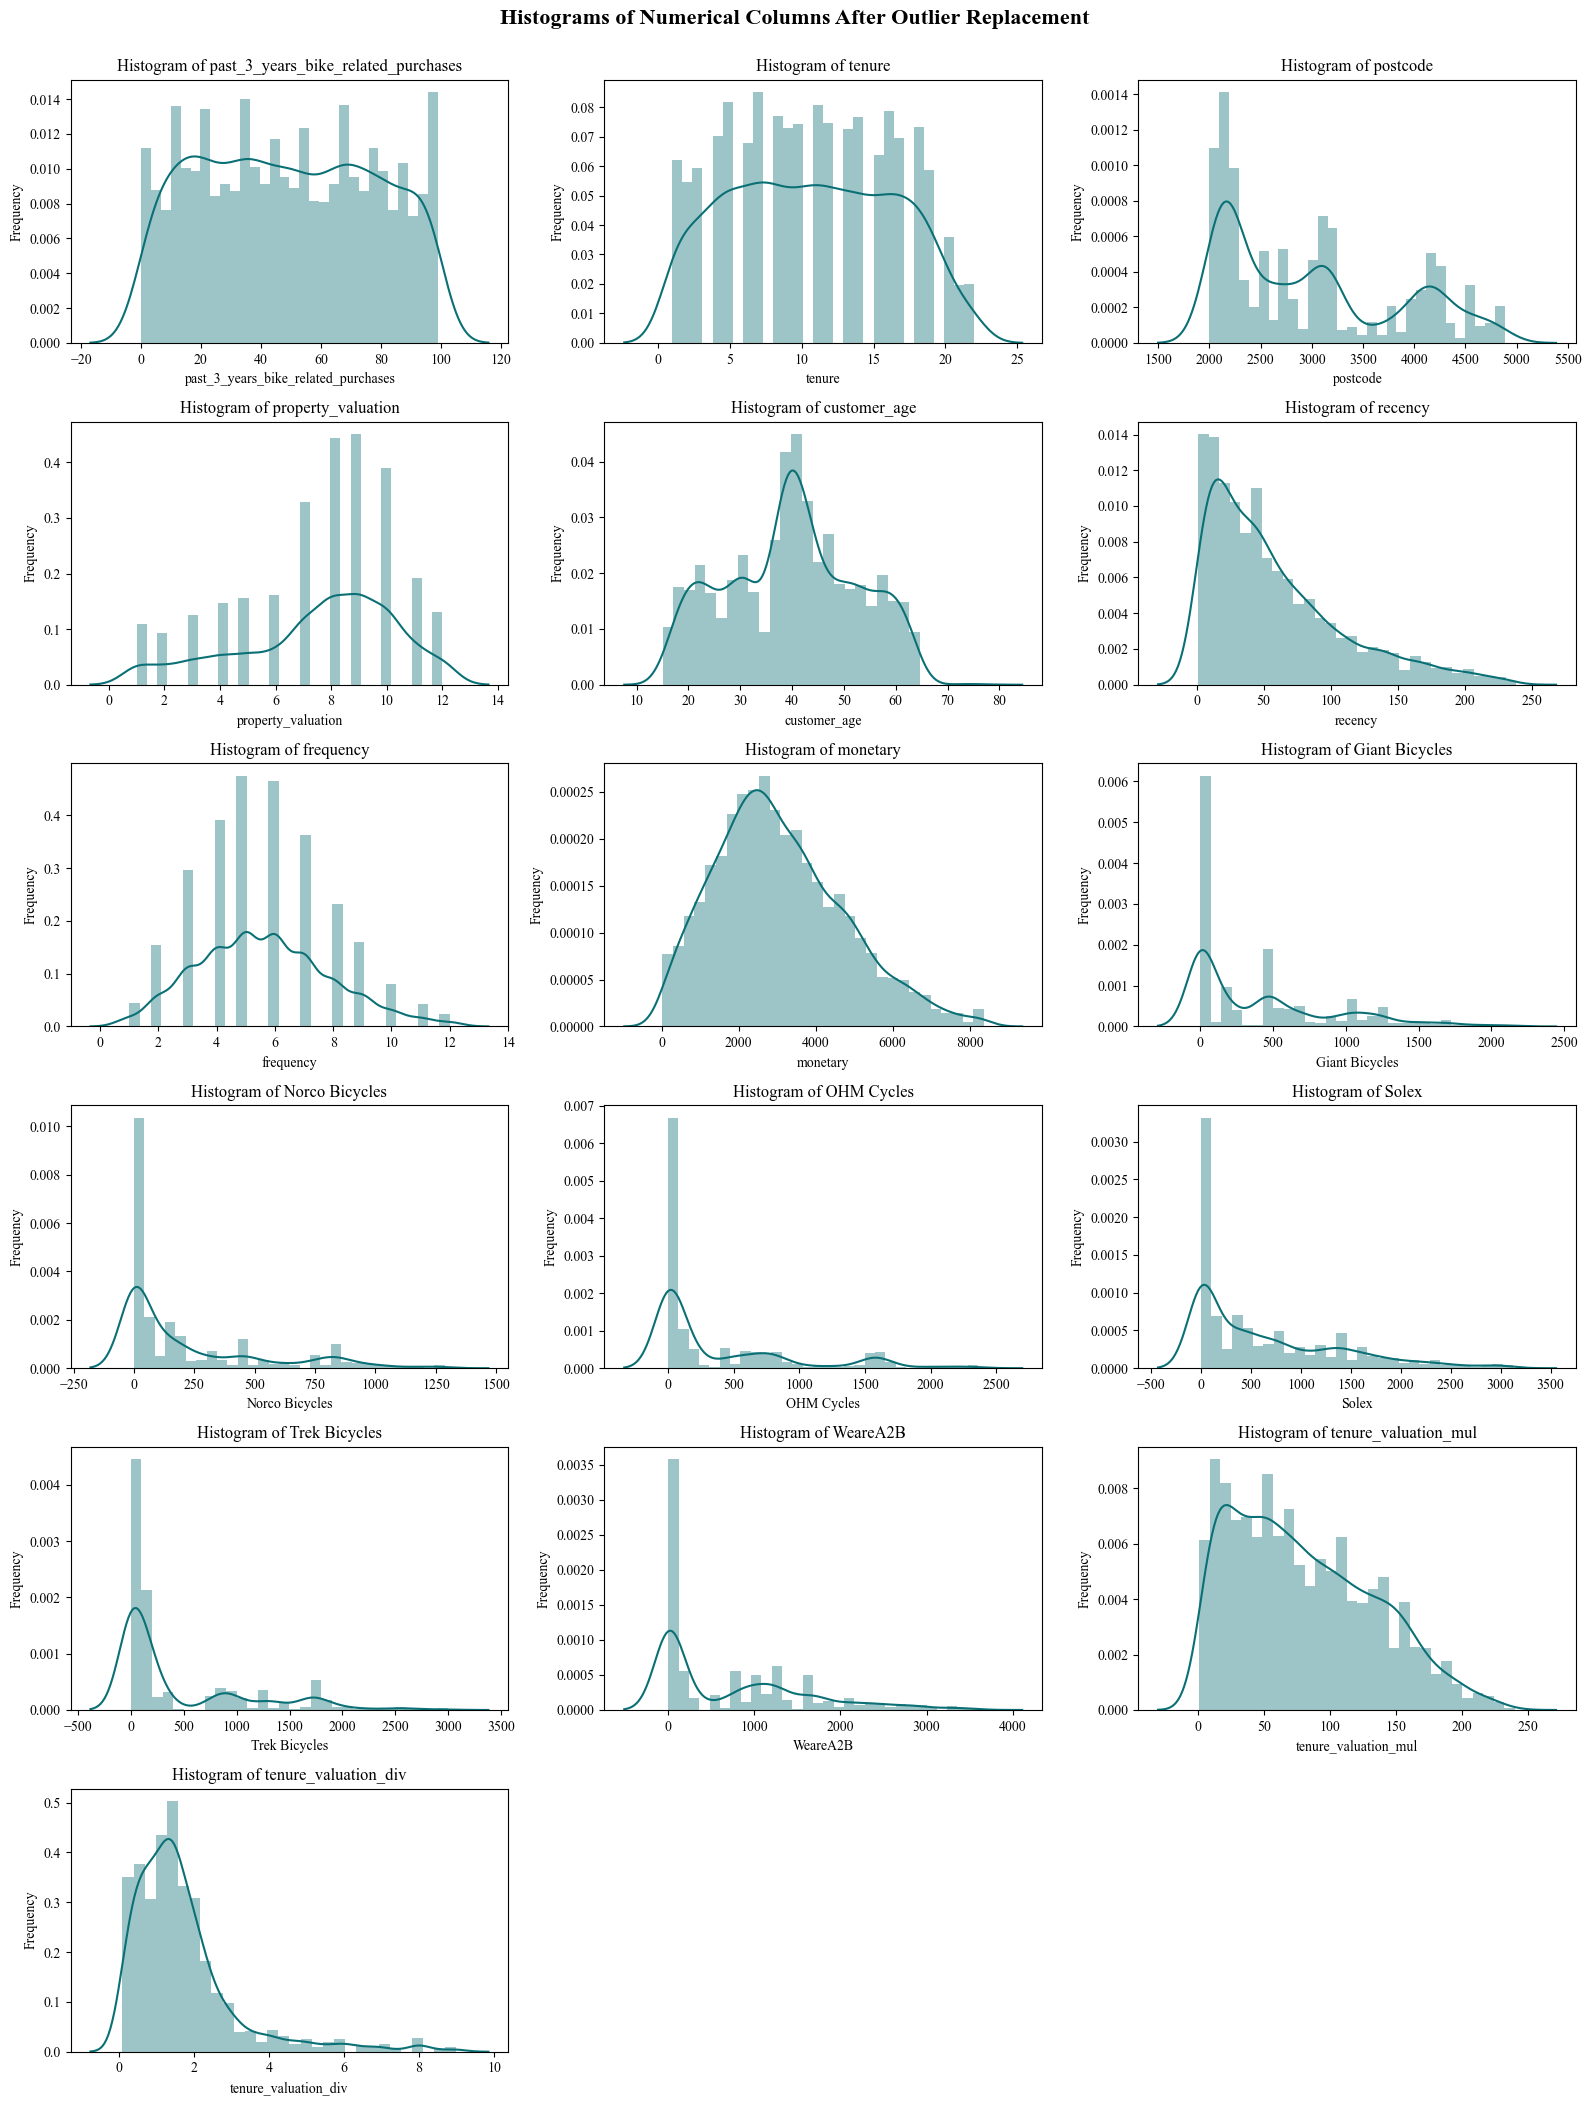

In [36]:
plt.figure(figsize=(16, 3.5 * rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)    
    sns.distplot(customerdata_merge_df[col], bins=30, kde=True, color='#0A7075')
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms of Numerical Columns After Outlier Replacement', fontsize=16,  fontweight = 'bold', y=1)
plt.tight_layout()
plt.show()


In [37]:
data_rfm = customerdata_merge_df.copy()

In [38]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3412 non-null   object        
 1   first_name                           3412 non-null   object        
 2   last_name                            3412 non-null   object        
 3   gender                               3412 non-null   object        
 4   past_3_years_bike_related_purchases  3412 non-null   float64       
 5   DOB                                  3412 non-null   datetime64[ns]
 6   job_title                            3412 non-null   object        
 7   job_industry_category                3412 non-null   object        
 8   wealth_segment                       3412 non-null   object        
 9   deceased_indicator                   3412 non-null   object        
 10  owns_car    

## 2.1. Data Pre-Processing

In [39]:
data_rfm.drop(['first_name','last_name', 'DOB', 'deceased_indicator', 'address','postcode','country', 'job_title'], axis=1, inplace=True)

In [40]:
numerical_columns=data_rfm.select_dtypes(include=('int64','float64'))

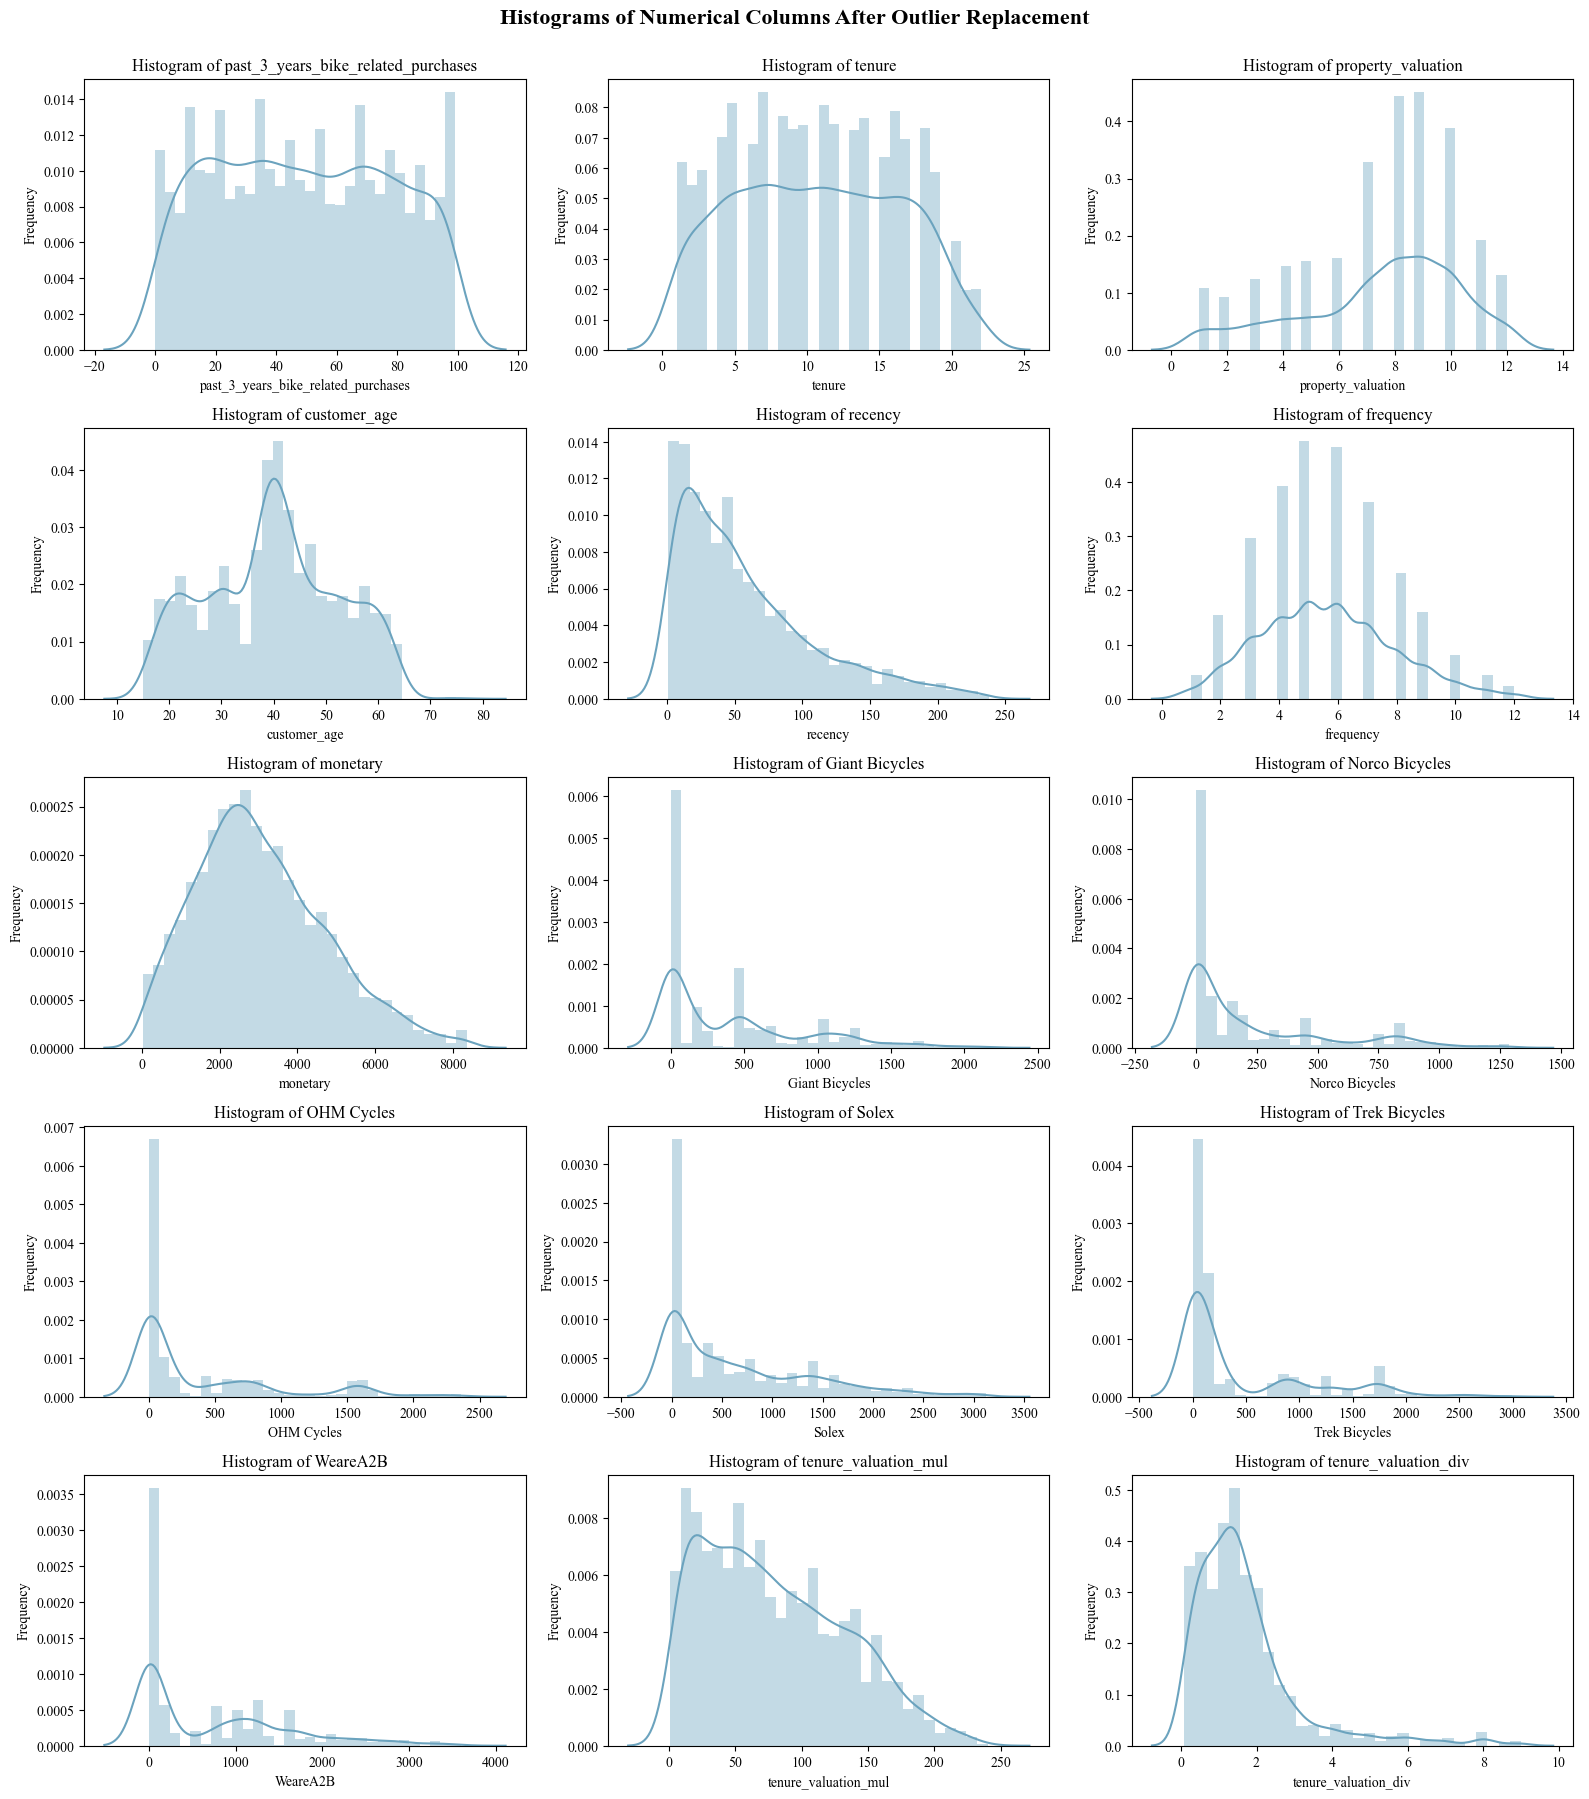

In [41]:
plt.figure(figsize=(16, 3.5 * rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)    
    sns.distplot(data_rfm[col], bins=30, kde=True, color='#6BA3BE')
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms of Numerical Columns After Outlier Replacement', fontsize=16,  fontweight = 'bold', y=1)
plt.tight_layout()
plt.show()

In [42]:
def calculate_skewness(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    skew_vals = df[num_cols].apply(lambda x: skew(x.dropna()))

    skew_df = pd.DataFrame({
        'Variable': skew_vals.index,
        'Skewness': skew_vals.values
    }).sort_values(by='Skewness', key=abs, ascending=False).reset_index(drop=True)
    
    return skew_df
calculate_skewness(data_rfm)

Variable  Skewness
0                  tenure_valuation_div  2.226960
1                            OHM Cycles  1.549574
2                         Trek Bicycles  1.520378
3                        Norco Bicycles  1.444631
4                               recency  1.201606
5                        Giant Bicycles  1.183909
6                                 Solex  1.142620
7                              WeareA2B  1.025955
8                    property_valuation -0.640877
9                              monetary  0.567529
10                 tenure_valuation_mul  0.521445
11                            frequency  0.336369
12                               tenure  0.051190
13  past_3_years_bike_related_purchases  0.050961
14                         customer_age -0.000988

In [43]:
def best_skew_fix(data, threshold=0.5):
    result = []
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:
        original = data[col]
        orig_skew = skew(original.dropna())

        if abs(orig_skew) > threshold:
            transformations = {}

            # Log1p
            try:
                log_skew = skew(np.log1p(original[original >= 0]))
                transformations['log1p'] = log_skew
            except:
                transformations['log1p'] = np.nan

            # Sqrt
            try:
                sqrt_skew = skew(np.sqrt(original[original >= 0]))
                transformations['sqrt'] = sqrt_skew
            except:
                transformations['sqrt'] = np.nan

            # Box-Cox ---
            try:
                boxcox_skew = skew(boxcox(original[original > 0])[0])
                transformations['boxcox'] = boxcox_skew
            except:
                transformations['boxcox'] = np.nan

            best_method = min(transformations, key=lambda k: abs(transformations[k]) if pd.notnull(transformations[k]) else np.inf)
            best_skew = transformations[best_method]

            result.append({
                'Column': col,
                'Original_Skew': orig_skew,
                'Best_Method': best_method,
                'Transformed_Skew': best_skew
            })

    return pd.DataFrame(result)


In [44]:
best_skew_fix(data_rfm, threshold=0.5)

Column  Original_Skew Best_Method  Transformed_Skew
0     property_valuation      -0.640877        sqrt         -1.166973
1                recency       1.201606        sqrt          0.353178
2               monetary       0.567529        sqrt         -0.233037
3         Giant Bicycles       1.183909        sqrt          0.313605
4         Norco Bicycles       1.444631       log1p         -0.067295
5             OHM Cycles       1.549574       log1p          0.016432
6                  Solex       1.142620        sqrt          0.208495
7          Trek Bicycles       1.520378       log1p         -0.100595
8               WeareA2B       1.025955       log1p         -0.268530
9   tenure_valuation_mul       0.521445        sqrt         -0.105831
10  tenure_valuation_div       2.226960       log1p          0.603290

In [45]:
from scipy.stats import boxcox
skew_fixes = best_skew_fix(data_rfm)

data_rfm_transformed = data_rfm.copy()

for _, row in skew_fixes.iterrows():
    col = row['Column']
    method = row['Best_Method']

    if method == 'log1p':
        data_rfm_transformed[col] = np.log1p(data_rfm_transformed[col])
    elif method == 'sqrt':
        data_rfm_transformed[col] = np.sqrt(data_rfm_transformed[col])
    elif method == 'boxcox':
        positive_data = data_rfm_transformed[col][data_rfm_transformed[col] > 0]
        if not positive_data.empty:
            transformed, _ = boxcox(positive_data)
            data_rfm_transformed.loc[positive_data.index, col] = transformed


In [46]:
new_skew_df = calculate_skewness(data_rfm_transformed)
new_skew_df

Variable  Skewness
0                              WeareA2B  0.387582
1                             frequency  0.336369
2                    property_valuation -0.301516
3                        Giant Bicycles  0.183788
4                  tenure_valuation_mul -0.105831
5                         Trek Bicycles -0.085983
6                               recency -0.073438
7                                 Solex  0.066276
8                              monetary -0.055527
9                                tenure  0.051190
10  past_3_years_bike_related_purchases  0.050961
11                           OHM Cycles  0.016432
12                 tenure_valuation_div  0.015385
13                       Norco Bicycles  0.006067
14                         customer_age -0.000988

In [47]:
data_rfm_transformed

customer_id  gender  past_3_years_bike_related_purchases  \
0              1  Female                                 93.0   
1              2    Male                                 81.0   
2              4    Male                                 33.0   
3              5  Female                                 56.0   
4              6    Male                                 35.0   
...          ...     ...                                  ...   
3407        3496    Male                                 99.0   
3408        3497  Female                                 73.0   
3409        3498  Female                                 28.0   
3410        3499    Male                                 29.0   
3411        3500  Female                                 71.0   

     job_industry_category     wealth_segment owns_car  tenure state  \
0                   Health      Mass Customer      Yes    11.0   NSW   
1       Financial Services      Mass Customer      Yes    16.0   NSW   
2                       IT      Mass Customer       No     7.0   QLD   
3                   Others  Affluent Customer      Yes     8.0   NSW   
4                   Retail     High Net Worth      Yes    13.0   VIC   
...                    ...                ...      ...     ...   ...   
3407         Manufacturing      Mass Customer      Yes    19.0   NSW   
3408         Manufacturing  Affluent Customer      Yes    18.0   VIC   
3409         Manufacturing      Mass Customer       No     5.0   VIC   
3410         Manufacturing      Mass Customer      Yes     7.0   QLD   
3411         Entertainment  Affluent Customer       No    17.0   NSW   

      property_valuation  customer_age  ...  frequency    monetary  \
0              17.184954          64.0  ...       11.0  195.780257   
1              17.184954          37.0  ...        3.0  163.085934   
2              14.732525          56.0  ...        2.0   39.970704   
3               4.254600          40.0  ...        6.0  170.401870   
4              14.732525          51.0  ...        5.0  229.936869   
...                  ...           ...  ...        ...         ...   
3407           14.732525          31.0  ...        4.0  155.007430   
3408            6.074740          31.0  ...        3.0  136.110686   
3409            4.254600          22.0  ...        6.0  200.767231   
3410           14.732525          38.0  ...        7.0  263.517313   
3411           17.184954          50.0  ...        6.0  142.838664   

      Giant Bicycles  Norco Bicycles  OHM Cycles      Solex  Trek Bicycles  \
0          46.479727        6.291215    5.229503  34.854612       5.402990   
1          26.207375        0.000000    0.000000   0.000000       0.000000   
2           8.547586        0.000000    0.000000  18.080577       0.000000   
3          40.457829        7.595083    0.000000  30.651310       4.432134   
4          38.780384        0.000000    0.000000   0.000000       5.108484   
...              ...             ...         ...        ...            ...   
3407        0.000000        7.292929    0.000000  48.105248       4.874879   
3408       44.054663        0.000000    0.000000  16.298580       0.000000   
3409        0.000000        0.000000    6.125668  45.731220       5.108484   
3410       35.074781        6.303427    0.000000  31.630135       0.000000   
3411       23.270281        0.000000    6.370363   5.521080       0.000000   

        WeareA2B  tenure_valuation_mul  tenure_valuation_div  
0       0.000000             10.488088              0.096277  
1     118.701780             12.649111              0.494148  
2       0.000000              7.937254             -0.244755  
3      25.687301              5.656854              0.746510  
4     150.382671             10.816654              0.382397  
...          ...                   ...                   ...  
3407    0.000000             13.076697              0.809469  
3408    0.000000              9.486833              1.471157  
3409   90.7795

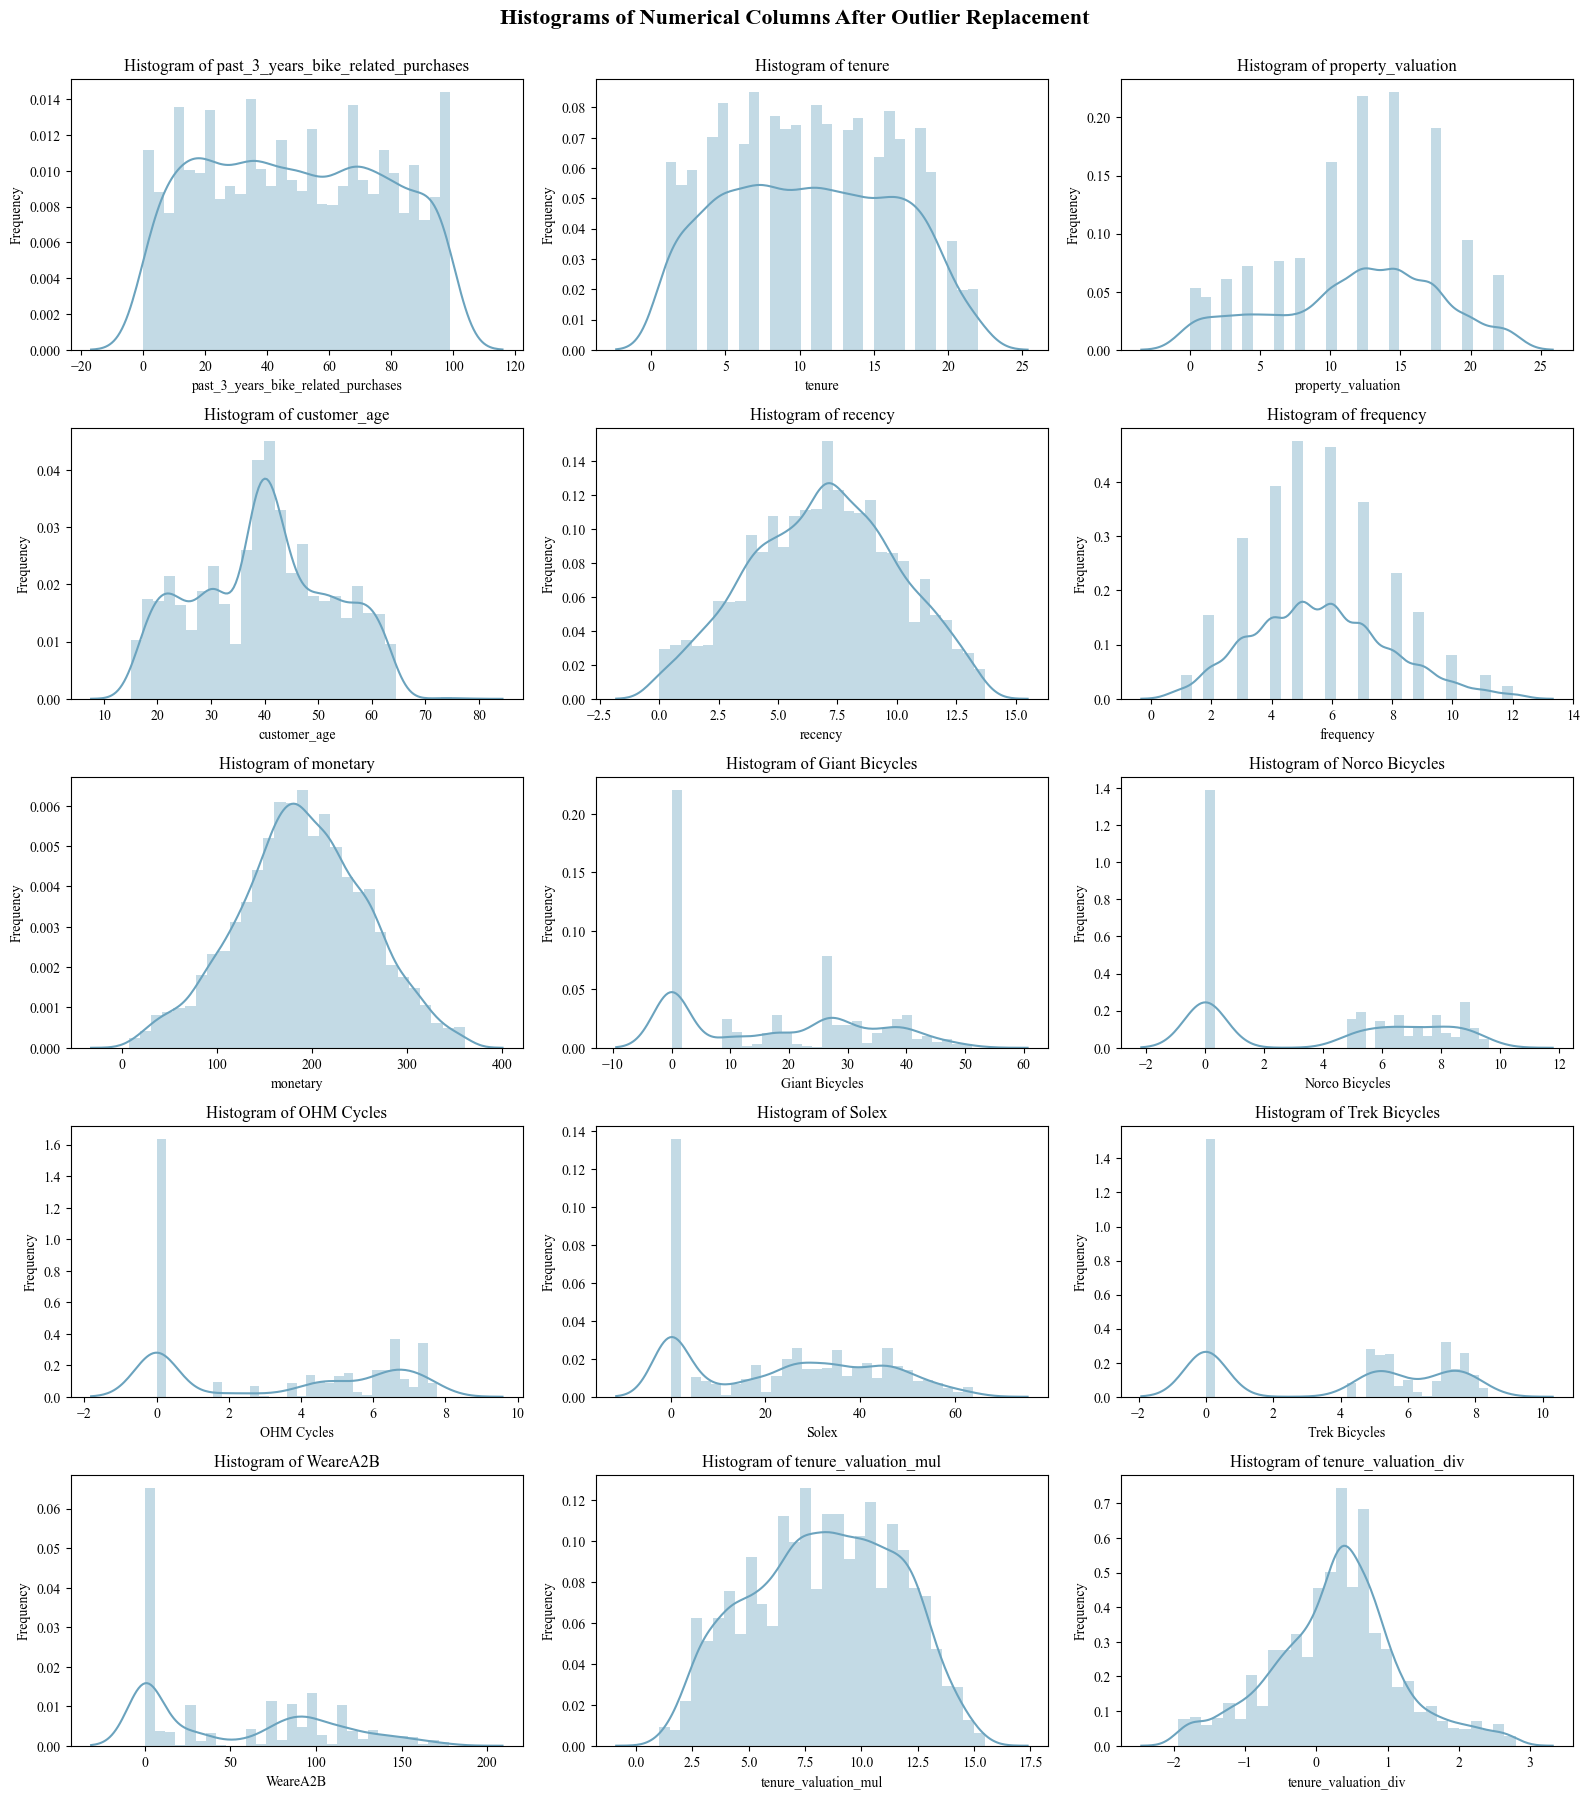

In [48]:
plt.figure(figsize=(16, 3.5 * rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)    
    sns.distplot(data_rfm_transformed[col], bins=30, kde=True, color='#6BA3BE')
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms of Numerical Columns After Outlier Replacement', fontsize=16, fontweight = 'bold', y=1)
plt.tight_layout()
plt.show()

In [49]:
data_rfm=data_rfm_transformed.copy()

In [50]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3412 non-null   object 
 1   gender                               3412 non-null   object 
 2   past_3_years_bike_related_purchases  3412 non-null   float64
 3   job_industry_category                3412 non-null   object 
 4   wealth_segment                       3412 non-null   object 
 5   owns_car                             3412 non-null   object 
 6   tenure                               3412 non-null   float64
 7   state                                3412 non-null   object 
 8   property_valuation                   3412 non-null   float64
 9   customer_age                         3412 non-null   float64
 10  recency                              3412 non-null   float64
 11  frequency                     

In [51]:
data_rfm.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'job_industry_category', 'wealth_segment',
       'owns_car', 'state'],
      dtype='object')

In [52]:
category_cols=['gender', 'job_industry_category',
       'wealth_segment', 'owns_car', 'state']

In [53]:
# Convert all object data type columns to categorical features
for col in category_cols:
    data_rfm[col] = data_rfm[col].astype('category')

In [54]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3412 non-null   object  
 1   gender                               3412 non-null   category
 2   past_3_years_bike_related_purchases  3412 non-null   float64 
 3   job_industry_category                3412 non-null   category
 4   wealth_segment                       3412 non-null   category
 5   owns_car                             3412 non-null   category
 6   tenure                               3412 non-null   float64 
 7   state                                3412 non-null   category
 8   property_valuation                   3412 non-null   float64 
 9   customer_age                         3412 non-null   float64 
 10  recency                              3412 non-null   float64 
 11  frequency        

In [55]:
data_rfm['customer_id']=data_rfm['customer_id'].astype('int64')

In [56]:
for col in category_cols:
    print(data_rfm[col].value_counts())

gender
Female    1758
Male      1654
Name: count, dtype: int64
job_industry_category
Manufacturing         701
Financial Services    679
Others                560
Health                526
Retail                304
Property              230
IT                    126
Entertainment         123
Argiculture           100
Telecommunications     63
Name: count, dtype: int64
wealth_segment
Mass Customer        1702
High Net Worth        873
Affluent Customer     837
Name: count, dtype: int64
owns_car
Yes    1723
No     1689
Name: count, dtype: int64
state
NSW    1824
VIC     860
QLD     728
Name: count, dtype: int64


In [57]:
data_rfm['job_industry_category'].value_counts()

job_industry_category
Manufacturing         701
Financial Services    679
Others                560
Health                526
Retail                304
Property              230
IT                    126
Entertainment         123
Argiculture           100
Telecommunications     63
Name: count, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
label_encoder = LabelEncoder()

for col in data_rfm.select_dtypes(include=['category']).columns:
    data_rfm[col] = label_encoder.fit_transform(data_rfm[col])
for col in data_rfm.select_dtypes(include = ['bool']).columns:
    data_rfm[col] = data_rfm[col].astype('int')

data_rfm.head()

customer_id  gender  past_3_years_bike_related_purchases  \
0            1       0                                 93.0   
1            2       1                                 81.0   
2            4       1                                 33.0   
3            5       0                                 56.0   
4            6       1                                 35.0   

   job_industry_category  wealth_segment  owns_car  tenure  state  \
0                      3               2         1    11.0      0   
1                      2               2         1    16.0      0   
2                      4               2         0     7.0      1   
3                      6               0         1     8.0      0   
4                      8               1         1    13.0      2   

   property_valuation  customer_age  ...  frequency    monetary  \
0           17.184954          64.0  ...       11.0  195.780257   
1           17.184954          37.0  ...        3.0  163.085934   
2           14.732525          56.0  ...        2.0   39.970704   
3            4.254600          40.0  ...        6.0  170.401870   
4           14.732525          51.0  ...        5.0  229.936869   

   Giant Bicycles  Norco Bicycles  OHM Cycles      Solex  Trek Bicycles  \
0       46.479727        6.291215    5.229503  34.854612       5.402990   
1       26.207375        0.000000    0.000000   0.000000       0.000000   
2        8.547586        0.000000    0.000000  18.080577       0.000000   
3       40.457829        7.595083    0.000000  30.651310       4.432134   
4       38.780384        0.000000    0.000000   0.000000       5.108484   

     WeareA2B  tenure_valuation_mul  tenure_valuation_div  
0    0.000000             10.488088              0.096277  
1  118.701780             12.649111              0.494148  
2    0.000000              7.937254             -0.244755  
3   25.687301              5.656854              0.746510  
4  150.382671             10.816654              0.382397  

[5 rows x 21 columns]

In [60]:
data_rfm

customer_id  gender  past_3_years_bike_related_purchases  \
0               1       0                                 93.0   
1               2       1                                 81.0   
2               4       1                                 33.0   
3               5       0                                 56.0   
4               6       1                                 35.0   
...           ...     ...                                  ...   
3407         3496       1                                 99.0   
3408         3497       0                                 73.0   
3409         3498       0                                 28.0   
3410         3499       1                                 29.0   
3411         3500       0                                 71.0   

      job_industry_category  wealth_segment  owns_car  tenure  state  \
0                         3               2         1    11.0      0   
1                         2               2         1    16.0      0   
2                         4               2         0     7.0      1   
3                         6               0         1     8.0      0   
4                         8               1         1    13.0      2   
...                     ...             ...       ...     ...    ...   
3407                      5               2         1    19.0      0   
3408                      5               0         1    18.0      2   
3409                      5               2         0     5.0      2   
3410                      5               2         1     7.0      1   
3411                      1               0         0    17.0      0   

      property_valuation  customer_age  ...  frequency    monetary  \
0              17.184954          64.0  ...       11.0  195.780257   
1              17.184954          37.0  ...        3.0  163.085934   
2              14.732525          56.0  ...        2.0   39.970704   
3               4.254600          40.0  ...        6.0  170.401870   
4              14.732525          51.0  ...        5.0  229.936869   
...                  ...           ...  ...        ...         ...   
3407           14.732525          31.0  ...        4.0  155.007430   
3408            6.074740          31.0  ...        3.0  136.110686   
3409            4.254600          22.0  ...        6.0  200.767231   
3410           14.732525          38.0  ...        7.0  263.517313   
3411           17.184954          50.0  ...        6.0  142.838664   

      Giant Bicycles  Norco Bicycles  OHM Cycles      Solex  Trek Bicycles  \
0          46.479727        6.291215    5.229503  34.854612       5.402990   
1          26.207375        0.000000    0.000000   0.000000       0.000000   
2           8.547586        0.000000    0.000000  18.080577       0.000000   
3          40.457829        7.595083    0.000000  30.651310       4.432134   
4          38.780384        0.000000    0.000000   0.000000       5.108484   
...              ...             ...         ...        ...            ...   
3407        0.000000        7.292929    0.000000  48.105248       4.874879   
3408       44.054663        0.000000    0.000000  16.298580       0.000000   
3409        0.000000        0.000000    6.125668  45.731220       5.108484   
3410       35.074781        6.303427    0.000000  31.630135       0.000000   
3411       23.270281        0.000000    6.370363   5.521080       0.000000   

        WeareA2B  tenure_valuation_mul  tenure_valuation_div  
0       0.000000             10.488088              0.096277  
1     118.701780             12.649111              0.494148  
2       0.000000              7.937254             -0.244755  
3      25.687301              5.656854              0.746510  
4     150.382671             10.816654              0.382397  
...          ...                   ...                   ...  
3407    0.000000             13.076697              0.809469  
3408    0.000000              9.486833              1.471157  
340

In [61]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3412 non-null   int64  
 1   gender                               3412 non-null   int64  
 2   past_3_years_bike_related_purchases  3412 non-null   float64
 3   job_industry_category                3412 non-null   int64  
 4   wealth_segment                       3412 non-null   int64  
 5   owns_car                             3412 non-null   int64  
 6   tenure                               3412 non-null   float64
 7   state                                3412 non-null   int64  
 8   property_valuation                   3412 non-null   float64
 9   customer_age                         3412 non-null   float64
 10  recency                              3412 non-null   float64
 11  frequency                     

In [62]:
ds=data_rfm.select_dtypes(include=['int64', 'float64'])

In [63]:
ds.drop('customer_id', inplace=True, axis=1)

In [64]:
ds

gender  past_3_years_bike_related_purchases  job_industry_category  \
0          0                                 93.0                      3   
1          1                                 81.0                      2   
2          1                                 33.0                      4   
3          0                                 56.0                      6   
4          1                                 35.0                      8   
...      ...                                  ...                    ...   
3407       1                                 99.0                      5   
3408       0                                 73.0                      5   
3409       0                                 28.0                      5   
3410       1                                 29.0                      5   
3411       0                                 71.0                      1   

      wealth_segment  owns_car  tenure  state  property_valuation  \
0                  2         1    11.0      0           17.184954   
1                  2         1    16.0      0           17.184954   
2                  2         0     7.0      1           14.732525   
3                  0         1     8.0      0            4.254600   
4                  1         1    13.0      2           14.732525   
...              ...       ...     ...    ...                 ...   
3407               2         1    19.0      0           14.732525   
3408               0         1    18.0      2            6.074740   
3409               2         0     5.0      2            4.254600   
3410               2         1     7.0      1           14.732525   
3411               0         0    17.0      0           17.184954   

      customer_age    recency  frequency    monetary  Giant Bicycles  \
0             64.0   2.874211       11.0  195.780257       46.479727   
1             37.0  10.864674        3.0  163.085934       26.207375   
2             56.0  12.742887        2.0   39.970704        8.547586   
3             40.0   4.437637        6.0  170.401870       40.457829   
4             51.0   8.248294        5.0  229.936869       38.780384   
...            ...        ...        ...         ...             ...   
3407          31.0   7.048783        4.0  155.007430        0.000000   
3408          31.0   7.566443        3.0  136.110686       44.054663   
3409          22.0  10.831889        6.0  200.767231        0.000000   
3410          38.0   7.504884        7.0  263.517313       35.074781   
3411          50.0  11.366450        6.0  142.838664       23.270281   

      Norco Bicycles  OHM Cycles      Solex  Trek Bicycles    WeareA2B  \
0           6.291215    5.229503  34.854612       5.402990    0.000000   
1           0.000000    0.000000   0.000000       0.000000  118.701780   
2           0.000000    0.000000  18.080577       0.000000    0.000000   
3           7.595083    0.000000  30.651310       4.432134   25.687301   
4           0.000000    0.000000   0.000000       5.108484  150.382671   
...              ...         ...        ...            ...         ...   
3407        7.292929    0.000000  48.105248       4.874879    0.000000   
3408        0.000000    0.000000  16.298580       0.000000    0.000000   
3409        0.000000    6.125668  45.731220       5.108484   90.779576   
3410        6.303427    0.000000  31.630135       0.000000  168.716609   
3411        0.000000    6.370363   5.521080       0.000000   77.300567   

      tenure_valuation_mul  tenure_valuation_div  
0                10.488088              0.096277  
1                12.649111              0.494148  
2                 7.937254             -0.244755  
3                 5.656854              0.746510  
4                10.816654              0.382397  
...                    ...                   ...  
3407             13.076697              0.809469  
3408              9.486833              1.471157  
3409              4.472136              0.228491  


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)

In [66]:
scaled_ds

gender  past_3_years_bike_related_purchases  job_industry_category  \
0    -0.96997                             1.536898              -0.633489   
1     1.03096                             1.118012              -1.083701   
2     1.03096                            -0.557533              -0.183278   
3    -0.96997                             0.245332               0.717145   
4     1.03096                            -0.487718               1.617569   
...       ...                                  ...                    ...   
3407  1.03096                             1.746341               0.266934   
3408 -0.96997                             0.838755               0.266934   
3409 -0.96997                            -0.732069               0.266934   
3410  1.03096                            -0.697162               0.266934   
3411 -0.96997                             0.768940              -1.533913   

      wealth_segment  owns_car    tenure     state  property_valuation  \
0           0.905332  0.990084  0.056682 -0.853396            0.910642   
1           0.905332  0.990084  0.938170 -0.853396            0.910642   
2           0.905332 -1.010015 -0.648508  0.336060            0.494913   
3          -1.520261  0.990084 -0.472211 -0.853396           -1.281275   
4          -0.307464  0.990084  0.409277  1.525516            0.494913   
...              ...       ...       ...       ...                 ...   
3407        0.905332  0.990084  1.467062 -0.853396            0.494913   
3408       -1.520261  0.990084  1.290765  1.525516           -0.972730   
3409        0.905332 -1.010015 -1.001103  1.525516           -1.281275   
3410        0.905332  0.990084 -0.648508  0.336060            0.494913   
3411       -1.520261 -1.010015  1.114467 -0.853396            0.910642   

      customer_age   recency  frequency  monetary  Giant Bicycles  \
0         1.931137 -1.319766   2.383491  0.091414        1.790644   
1        -0.223343  1.290944  -1.167806 -0.396121        0.527319   
2         1.292773  1.904609  -1.611718 -2.232007       -0.573197   
3         0.016043 -0.808951   0.163930 -0.287027        1.415374   
4         0.893795  0.436098  -0.279982  0.600755        1.310839   
...            ...       ...        ...       ...             ...   
3407     -0.702117  0.044184  -0.723894 -0.516587       -1.105862   
3408     -0.702117  0.213319  -1.167806 -0.798374        1.639520   
3409     -1.420277  1.280232   0.163930  0.165779       -1.105862   
3410     -0.143548  0.193206   0.607842  1.101504        1.079915   
3411      0.813999  1.454888   0.163930 -0.698047        0.344287   

      Norco Bicycles  OHM Cycles     Solex  Trek Bicycles  WeareA2B  \
0           0.633876    0.618181  0.551009       0.539562 -1.004997   
1          -1.072501   -1.083917 -1.242112      -1.122467  1.219429   
2          -1.072501   -1.083917 -0.311943      -1.122467 -1.004997   
3           0.987527   -1.083917  0.334767       0.240914 -0.523627   
4          -1.072501   -1.083917 -1.242112       0.448968  1.813117   
...              ...         ...       ...            ...       ...   
3407        0.905573   -1.083917  1.232698       0.377108 -1.004997   
3408       -1.072501   -1.083917 -0.403619      -1.122467 -1.004997   
3409       -1.072501    0.909865  1.110565       0.448968  0.696178   
3410        0.637189   -1.083917  0.385124      -1.122467  2.156688   
3411       -1.072501    0.989508 -0.958076      -1.122467  0.443586   

      tenure_valuation_mul  tenure_valuation_div  
0                 0.674305             -0.214743  
1                 1.350001              0.235817  
2                -0.123275             -0.600936  
3                -0.836298              0.521598  
4                 0.777039              0.109266  
...                    ...                   ...  
3407              1.483696              0.592895  
3408              0.361238              1.342207  
3409             -1.206729             -0.065021  
3

In [67]:
scaled_ds_columns=scaled_ds.columns

In [68]:
scaled_ds_columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'customer_age', 'recency', 'frequency',
       'monetary', 'Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex',
       'Trek Bicycles', 'WeareA2B', 'tenure_valuation_mul',
       'tenure_valuation_div'],
      dtype='object')

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## principal conponent analysis

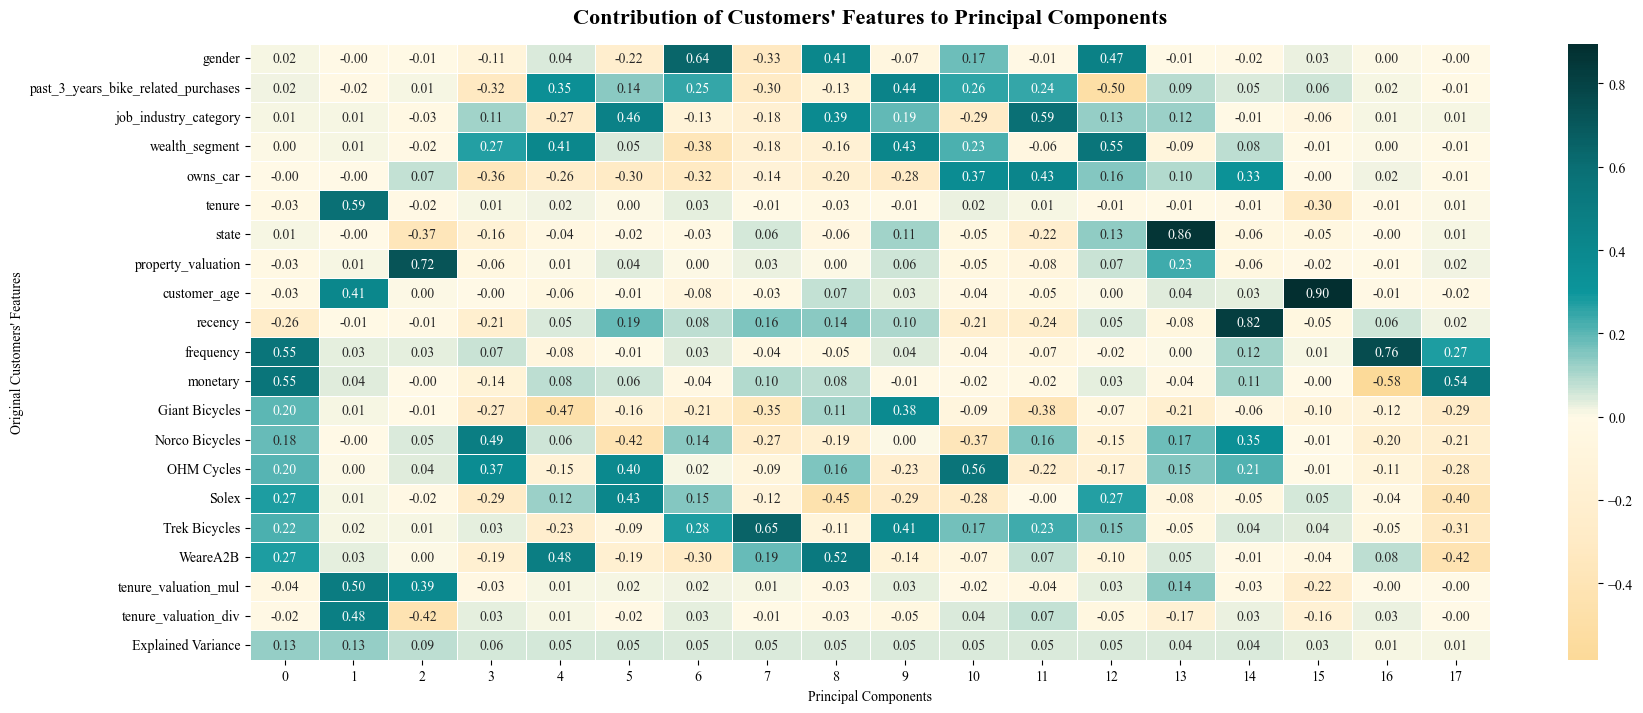

In [70]:
optimal_components = 18
pca = PCA(n_components = optimal_components)
data_pca = pca.fit_transform(scaled_ds)

feature_names = scaled_ds_columns
pca_df = pd.DataFrame(pca.components_, columns=feature_names)

explained_variance = pca.explained_variance_ratio_

pca_df_with_variance = pd.DataFrame(pca.components_, columns=feature_names)
pca_df_with_variance['Explained Variance'] = explained_variance

plt.figure(figsize=(20, 8))
sns.heatmap(pca_df_with_variance.T, annot=True, cmap=cmap_1, fmt='.2f', center=0, linecolor='white', linewidths=0.7)
plt.title("Contribution of Customers' Features to Principal Components", fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Principal Components')
plt.ylabel("Original Customers' Features")
plt.show()

# 3. Customer Segment - Clustering - KMenas Method

#

In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(X, clustering_algo):
    clustering_algo.fit(X)
    labels = clustering_algo.labels_
    if len(set(labels)) == 1:
        return None, None, None  
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Evaluate KMeans
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans_metrics = evaluate_clustering(data_pca, kmeans)

# Evaluate Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_metrics = evaluate_clustering(data_pca, hierarchical)

# Evaluate DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_pca)
labels_dbscan = dbscan.labels_

if len(set(labels_dbscan)) > 1:
    dbscan_metrics = (
        silhouette_score(data_pca, labels_dbscan),
        davies_bouldin_score(data_pca, labels_dbscan),
        calinski_harabasz_score(data_pca, labels_dbscan)
    )
else:
    dbscan_metrics = ('Not applicable (only one cluster found)', ) * 3


results = {
    'Clustering Method': ['KMeans', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_metrics[0], hierarchical_metrics[0], dbscan_metrics[0]],
    'Davies-Bouldin Index': [kmeans_metrics[1], hierarchical_metrics[1], dbscan_metrics[1]],
    'Calinski-Harabasz Index': [kmeans_metrics[2], hierarchical_metrics[2], dbscan_metrics[2]],
}

results_df = pd.DataFrame(results)
results_df

Clustering Method                         Silhouette Score  \
0            KMeans                                 0.078736   
1      Hierarchical                                 0.041942   
2            DBSCAN  Not applicable (only one cluster found)   

                      Davies-Bouldin Index  \
0                                 2.636502   
1                                 3.429804   
2  Not applicable (only one cluster found)   

                   Calinski-Harabasz Index  
0                                266.82624  
1                               175.918898  
2  Not applicable (only one cluster found)

D·ª±a tr√™n c√°c ch·ªâ s·ªë ƒë√°nh gi√°, KMeans l√† ph∆∞∆°ng ph√°p t·ªët nh·∫•t trong ba l·ª±a ch·ªçn, d√π hi·ªáu qu·∫£ v·∫´n ch∆∞a cao (Silhouette Score th·∫•p v√† Davies-Bouldin Index kh√° l·ªõn). Hierarchical clustering cho k·∫øt qu·∫£ k√©m h∆°n v·ªõi c√°c ch·ªâ s·ªë th·∫•p h∆°n. DBSCAN kh√¥ng hi·ªáu qu·∫£ v√¨ ch·ªâ t√¨m ƒë∆∞·ª£c m·ªôt c·ª•m, c√≥ th·ªÉ do tham s·ªë ch∆∞a ph√π h·ª£p.
üëâ G·ª£i √Ω: N√™n ti·∫øp t·ª•c d√πng KMeans v√† t·ªëi ∆∞u th√™m, ho·∫∑c ƒëi·ªÅu ch·ªânh tham s·ªë ƒë·ªÉ c·∫£i thi·ªán DBSCAN

In [125]:
scaled_ds.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'customer_age', 'recency', 'frequency',
       'monetary', 'Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex',
       'Trek Bicycles', 'WeareA2B', 'tenure_valuation_mul',
       'tenure_valuation_div'],
      dtype='object')

In [126]:
selected_cols=['property_valuation','frequency','recency','tenure','customer_age',
       'monetary', 'Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex',
       'Trek Bicycles', 'WeareA2B','tenure_valuation_mul','tenure_valuation_div']

In [127]:
scaled_ds[selected_cols]

property_valuation  frequency   recency    tenure  customer_age  \
0               0.910642   2.383491 -1.319766  0.056682      1.931137   
1               0.910642  -1.167806  1.290944  0.938170     -0.223343   
2               0.494913  -1.611718  1.904609 -0.648508      1.292773   
3              -1.281275   0.163930 -0.808951 -0.472211      0.016043   
4               0.494913  -0.279982  0.436098  0.409277      0.893795   
...                  ...        ...       ...       ...           ...   
3407            0.494913  -0.723894  0.044184  1.467062     -0.702117   
3408           -0.972730  -1.167806  0.213319  1.290765     -0.702117   
3409           -1.281275   0.163930  1.280232 -1.001103     -1.420277   
3410            0.494913   0.607842  0.193206 -0.648508     -0.143548   
3411            0.910642   0.163930  1.454888  1.114467      0.813999   

      monetary  Giant Bicycles  Norco Bicycles  OHM Cycles     Solex  \
0     0.091414        1.790644        0.633876    0.618181  0.551009   
1    -0.396121        0.527319       -1.072501   -1.083917 -1.242112   
2    -2.232007       -0.573197       -1.072501   -1.083917 -0.311943   
3    -0.287027        1.415374        0.987527   -1.083917  0.334767   
4     0.600755        1.310839       -1.072501   -1.083917 -1.242112   
...        ...             ...             ...         ...       ...   
3407 -0.516587       -1.105862        0.905573   -1.083917  1.232698   
3408 -0.798374        1.639520       -1.072501   -1.083917 -0.403619   
3409  0.165779       -1.105862       -1.072501    0.909865  1.110565   
3410  1.101504        1.079915        0.637189   -1.083917  0.385124   
3411 -0.698047        0.344287       -1.072501    0.989508 -0.958076   

      Trek Bicycles  WeareA2B  tenure_valuation_mul  tenure_valuation_div  
0          0.539562 -1.004997              0.674305             -0.214743  
1         -1.122467  1.219429              1.350001              0.235817  
2         -1.122467 -1.004997             -0.123275             -0.600936  
3          0.240914 -0.523627             -0.836298              0.521598  
4          0.448968  1.813117              0.777039              0.109266  
...             ...       ...                   ...                   ...  
3407       0.377108 -1.004997              1.483696              0.592895  
3408      -1.122467 -1.004997              0.361238              1.342207  
3409       0.448968  0.696178             -1.206729             -0.065021  
3410      -1.122467  2.156688             -0.123275             -0.600936  
3411      -1.122467  0.443586              1.471723              0.312130  

[3412 rows x 14 columns]

In [140]:
PCA_ds = scaled_ds[selected_cols]

In [141]:
PCA_ds


property_valuation  frequency   recency    tenure  customer_age  \
0               0.910642   2.383491 -1.319766  0.056682      1.931137   
1               0.910642  -1.167806  1.290944  0.938170     -0.223343   
2               0.494913  -1.611718  1.904609 -0.648508      1.292773   
3              -1.281275   0.163930 -0.808951 -0.472211      0.016043   
4               0.494913  -0.279982  0.436098  0.409277      0.893795   
...                  ...        ...       ...       ...           ...   
3407            0.494913  -0.723894  0.044184  1.467062     -0.702117   
3408           -0.972730  -1.167806  0.213319  1.290765     -0.702117   
3409           -1.281275   0.163930  1.280232 -1.001103     -1.420277   
3410            0.494913   0.607842  0.193206 -0.648508     -0.143548   
3411            0.910642   0.163930  1.454888  1.114467      0.813999   

      monetary  Giant Bicycles  Norco Bicycles  OHM Cycles     Solex  \
0     0.091414        1.790644        0.633876    0.618181  0.551009   
1    -0.396121        0.527319       -1.072501   -1.083917 -1.242112   
2    -2.232007       -0.573197       -1.072501   -1.083917 -0.311943   
3    -0.287027        1.415374        0.987527   -1.083917  0.334767   
4     0.600755        1.310839       -1.072501   -1.083917 -1.242112   
...        ...             ...             ...         ...       ...   
3407 -0.516587       -1.105862        0.905573   -1.083917  1.232698   
3408 -0.798374        1.639520       -1.072501   -1.083917 -0.403619   
3409  0.165779       -1.105862       -1.072501    0.909865  1.110565   
3410  1.101504        1.079915        0.637189   -1.083917  0.385124   
3411 -0.698047        0.344287       -1.072501    0.989508 -0.958076   

      Trek Bicycles  WeareA2B  tenure_valuation_mul  tenure_valuation_div  
0          0.539562 -1.004997              0.674305             -0.214743  
1         -1.122467  1.219429              1.350001              0.235817  
2         -1.122467 -1.004997             -0.123275             -0.600936  
3          0.240914 -0.523627             -0.836298              0.521598  
4          0.448968  1.813117              0.777039              0.109266  
...             ...       ...                   ...                   ...  
3407       0.377108 -1.004997              1.483696              0.592895  
3408      -1.122467 -1.004997              0.361238              1.342207  
3409       0.448968  0.696178             -1.206729             -0.065021  
3410      -1.122467  2.156688             -0.123275             -0.600936  
3411      -1.122467  0.443586              1.471723              0.312130  

[3412 rows x 14 columns]

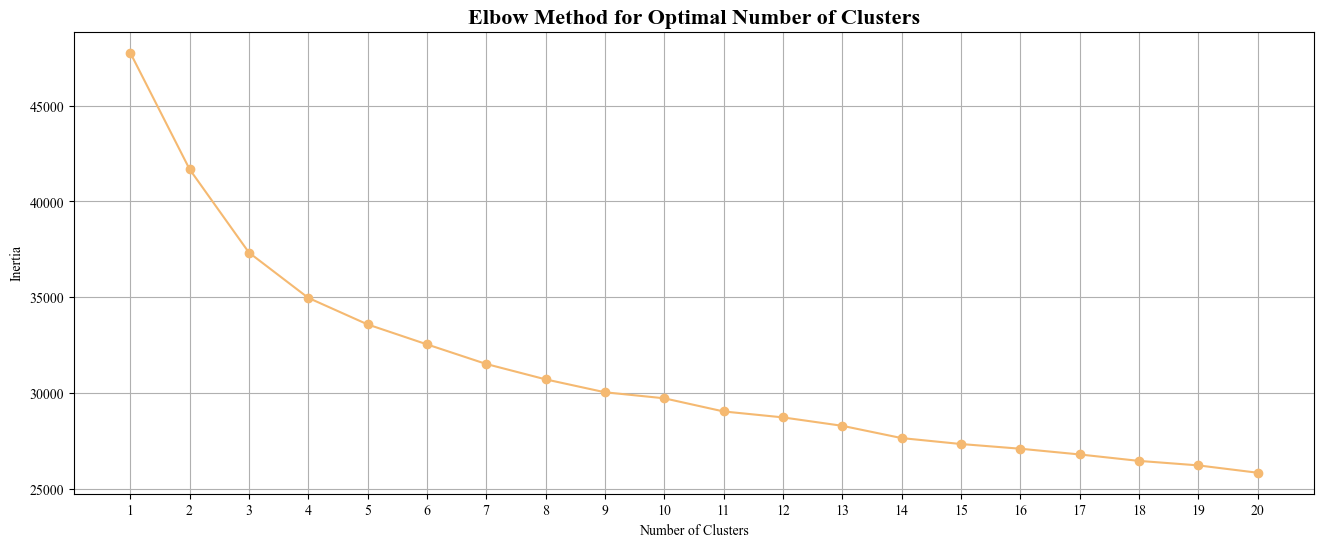

In [142]:
# ELBOW METHOD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def calculate_inertia(data, max_clusters):
    inertia = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=123)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia
max_clusters = 20
inertia = calculate_inertia(PCA_ds, max_clusters)

plt.figure(figsize=(16, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker = 'o', color='#f5b971')
plt.title('Elbow Method for Optimal Number of Clusters',  fontweight = 'bold', fontsize=16, y=1)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [143]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 123)
    kmeans.fit(normalised_df_rfm)
    cluster_labels = kmeans.labels_  
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    model = TSNE(random_state=123)
    transformed = model.fit_transform(df_new)
    
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number),  fontweight = 'bold', fontsize=14, y=1)
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette='pastel')
    
    return df_new

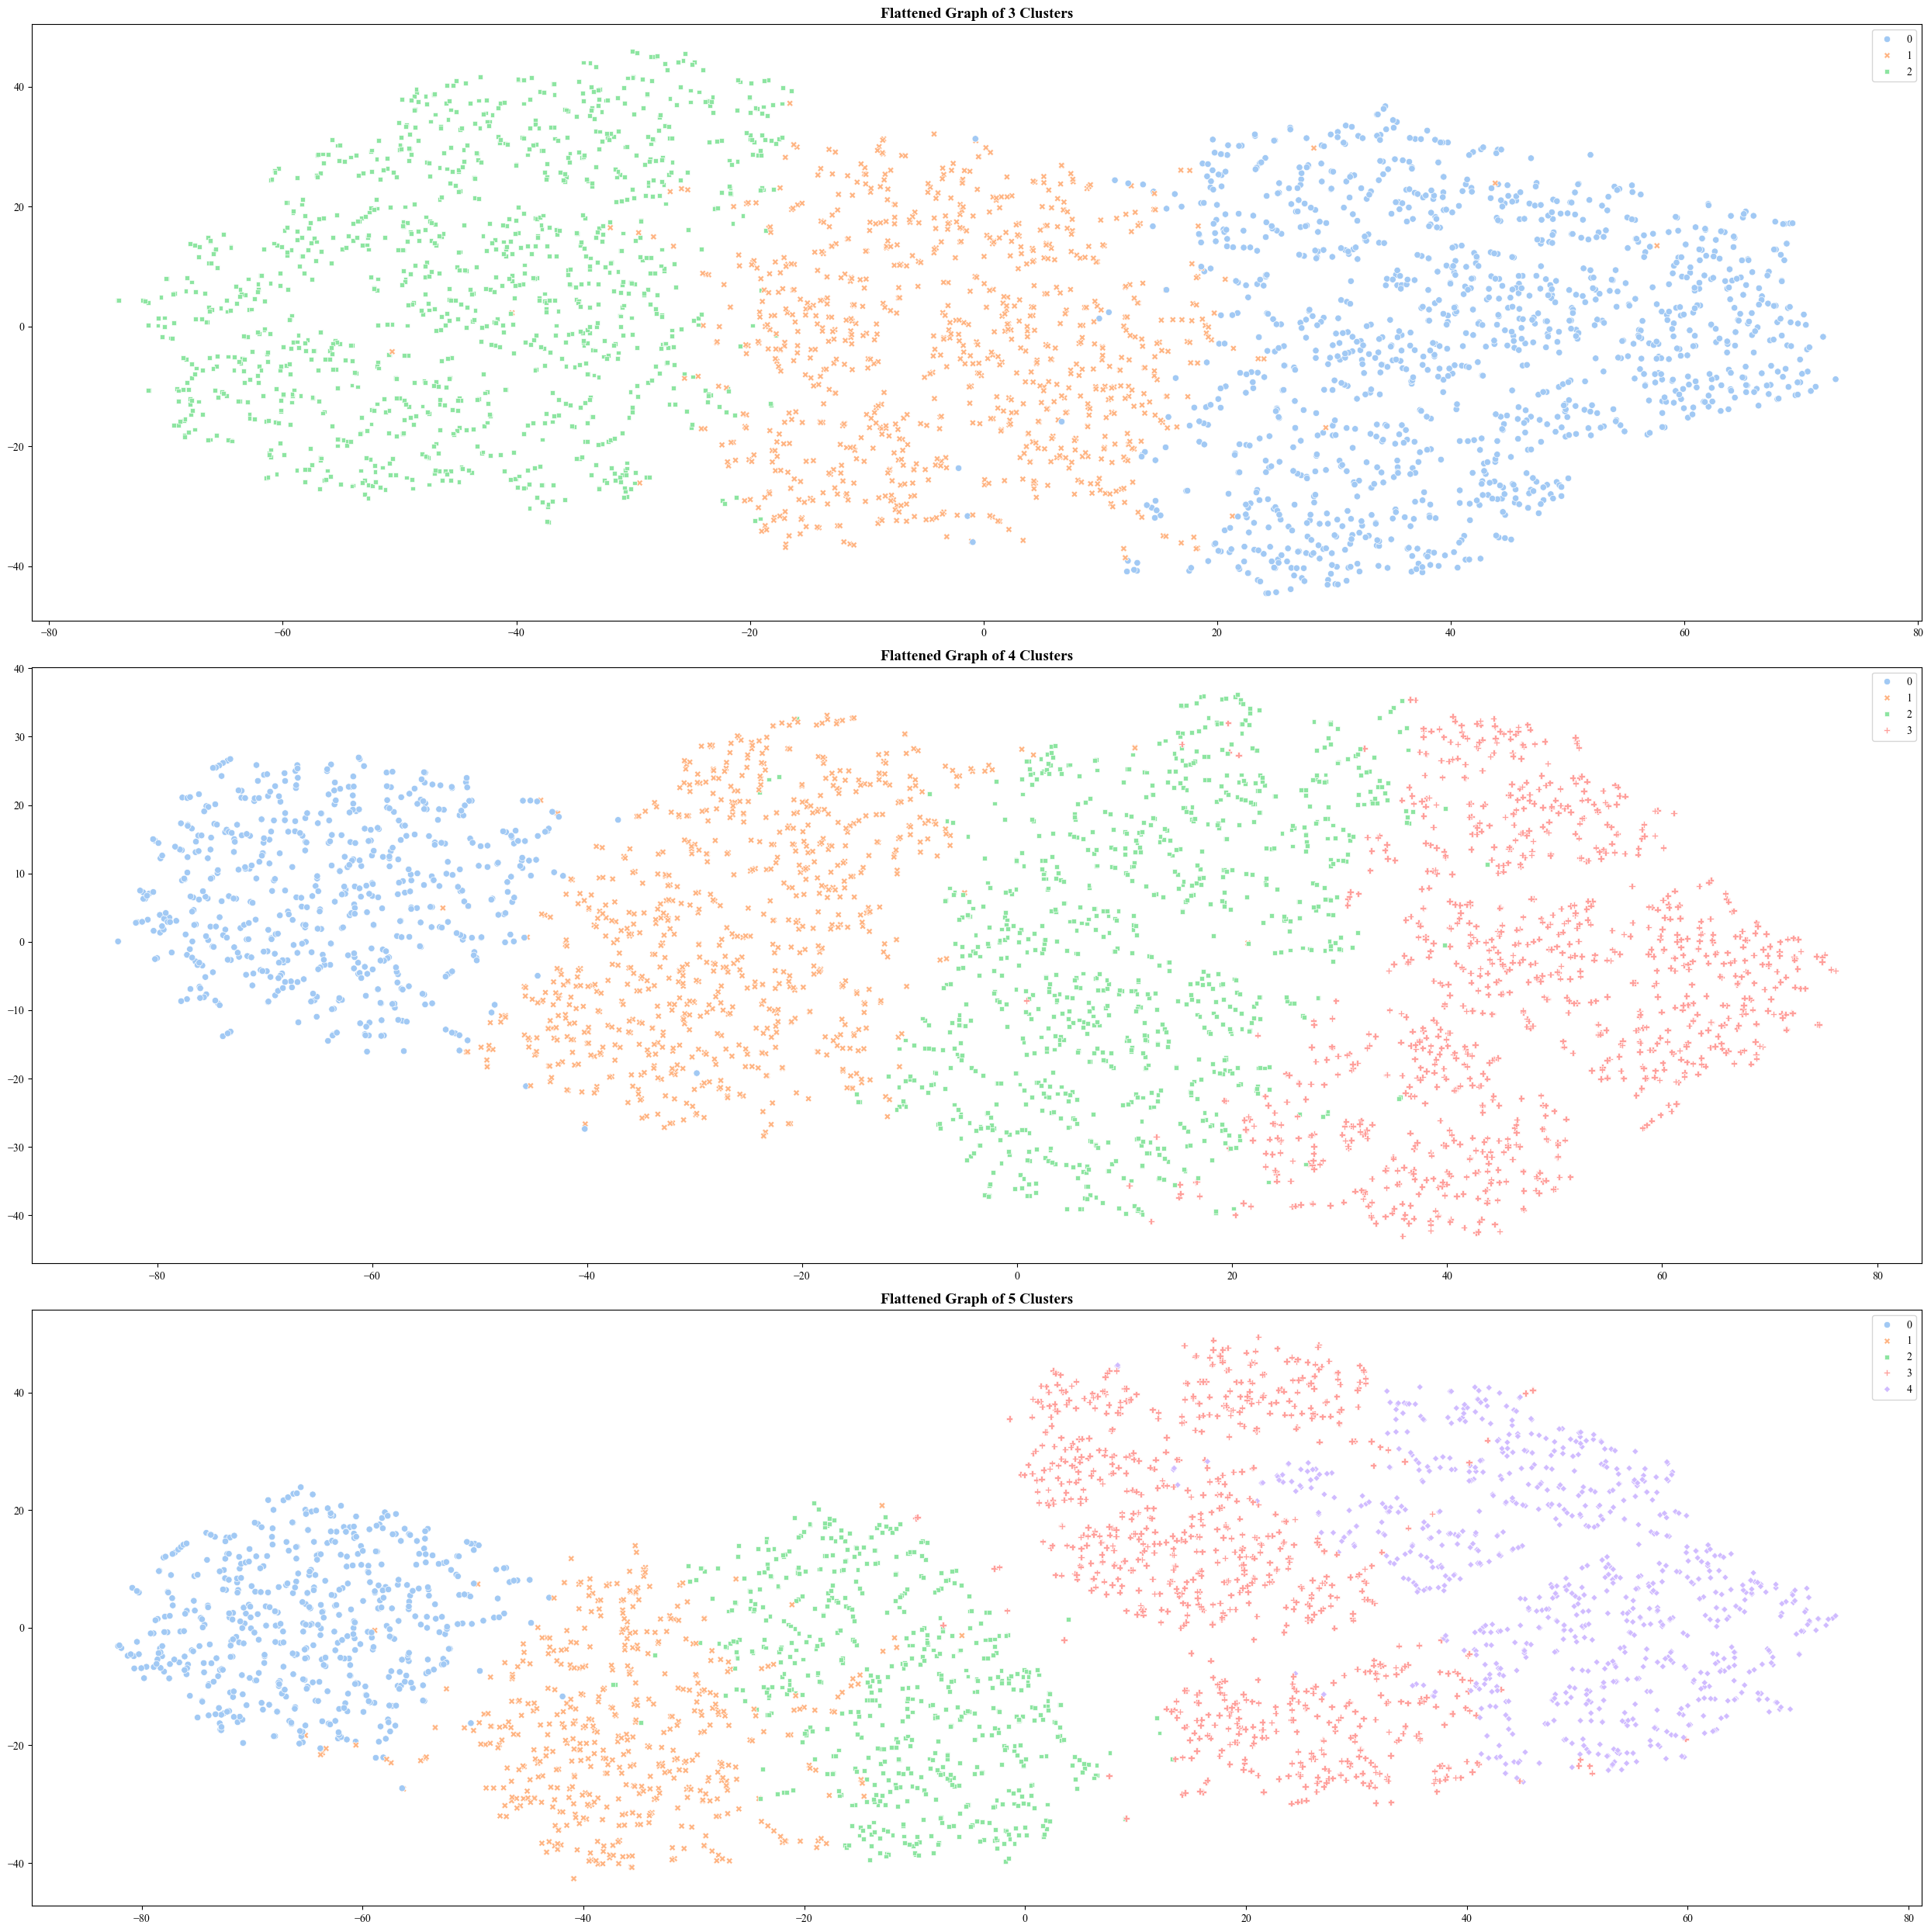

In [144]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(PCA_ds, 3, PCA_ds)
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(PCA_ds, 4, PCA_ds)
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(PCA_ds, 5, PCA_ds)
plt.tight_layout()
plt.show()

In [145]:
np.random.seed(123)
KM = KMeans(n_clusters=4, random_state = 123)

yhat_KM = KM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_KM

In [146]:
PCA_ds

property_valuation  frequency   recency    tenure  customer_age  \
0               0.910642   2.383491 -1.319766  0.056682      1.931137   
1               0.910642  -1.167806  1.290944  0.938170     -0.223343   
2               0.494913  -1.611718  1.904609 -0.648508      1.292773   
3              -1.281275   0.163930 -0.808951 -0.472211      0.016043   
4               0.494913  -0.279982  0.436098  0.409277      0.893795   
...                  ...        ...       ...       ...           ...   
3407            0.494913  -0.723894  0.044184  1.467062     -0.702117   
3408           -0.972730  -1.167806  0.213319  1.290765     -0.702117   
3409           -1.281275   0.163930  1.280232 -1.001103     -1.420277   
3410            0.494913   0.607842  0.193206 -0.648508     -0.143548   
3411            0.910642   0.163930  1.454888  1.114467      0.813999   

      monetary  Giant Bicycles  Norco Bicycles  OHM Cycles     Solex  \
0     0.091414        1.790644        0.633876    0.618181  0.551009   
1    -0.396121        0.527319       -1.072501   -1.083917 -1.242112   
2    -2.232007       -0.573197       -1.072501   -1.083917 -0.311943   
3    -0.287027        1.415374        0.987527   -1.083917  0.334767   
4     0.600755        1.310839       -1.072501   -1.083917 -1.242112   
...        ...             ...             ...         ...       ...   
3407 -0.516587       -1.105862        0.905573   -1.083917  1.232698   
3408 -0.798374        1.639520       -1.072501   -1.083917 -0.403619   
3409  0.165779       -1.105862       -1.072501    0.909865  1.110565   
3410  1.101504        1.079915        0.637189   -1.083917  0.385124   
3411 -0.698047        0.344287       -1.072501    0.989508 -0.958076   

      Trek Bicycles  WeareA2B  tenure_valuation_mul  tenure_valuation_div  \
0          0.539562 -1.004997              0.674305             -0.214743   
1         -1.122467  1.219429              1.350001              0.235817   
2         -1.122467 -1.004997             -0.123275             -0.600936   
3          0.240914 -0.523627             -0.836298              0.521598   
4          0.448968  1.813117              0.777039              0.109266   
...             ...       ...                   ...                   ...   
3407       0.377108 -1.004997              1.483696              0.592895   
3408      -1.122467 -1.004997              0.361238              1.342207   
3409       0.448968  0.696178             -1.206729             -0.065021   
3410      -1.122467  2.156688             -0.123275             -0.600936   
3411      -1.122467  0.443586              1.471723              0.312130   

      Clusters  
0            3  
1            2  
2            2  
3            0  
4            3  
...        ...  
3407         2  
3408         2  
3409         1  
3410         3  
3411         2  

[3412 rows x 15 columns]

In [85]:
customerdata_merge['clusters'] = KM.labels_

In [86]:
customerdata_merge

customer_id      first_name     last_name  gender  \
0              1         Laraine     Medendorp  Female   
1              2             Eli       Bockman    Male   
2              4          Talbot       Unknown    Male   
3              5  Sheila-kathryn        Calton  Female   
4              6            Curr     Duckhouse    Male   
...          ...             ...           ...     ...   
3407        3496           Danya      Burnyeat    Male   
3408        3497            Thia         O'Day  Female   
3409        3498            Lois       Abrahim  Female   
3410        3499         Shelton  Tewkesberrie    Male   
3411        3500            Josy       Fleeman  Female   

      past_3_years_bike_related_purchases        DOB  \
0                                      93 1953-10-12   
1                                      81 1980-12-16   
2                                      33 1961-10-03   
3                                      56 1977-05-13   
4                                      35 1966-09-16   
...                                   ...        ...   
3407                                   99 1986-04-25   
3408                                   73 1986-05-03   
3409                                   28 1995-11-02   
3410                                   29 1979-06-17   
3411                                   71 1967-07-21   

                        job_title job_industry_category     wealth_segment  \
0             Executive Secretary                Health      Mass Customer   
1          Administrative Officer    Financial Services      Mass Customer   
2                          Others                    IT      Mass Customer   
3                   Senior Editor                Others  Affluent Customer   
4                          Others                Retail     High Net Worth   
...                           ...                   ...                ...   
3407                       Editor         Manufacturing      Mass Customer   
3408  Administrative Assistant IV         Manufacturing  Affluent Customer   
3409                       Others         Manufacturing      Mass Customer   
3410                       Others         Manufacturing      Mass Customer   
3411                       Others         Entertainment  Affluent Customer   

     deceased_indicator  ... monetary  Giant Bicycles Norco Bicycles  \
0                    No  ...  3018.09         1708.37         165.85   
1                    No  ...  2226.26          448.68           0.00   
2                    No  ...   220.57           41.13           0.00   
3                    No  ...  2394.94         1230.27         385.56   
4                    No  ...  3946.55         1113.55           0.00   
...                 ...  ...      ...             ...            ...   
3407                 No  ...  2045.84            0.00         318.66   
3408                 No  ...  1648.32         1504.50           0.00   
3409                 No  ...  3147.33            0.00           0.00   
3410                 No  ...  4955.25          880.01         167.21   
3411                 No  ...  1785.86          342.48           0.00   

      OHM Cycles    Solex Trek Bicycles  WeareA2B  tenure_valuation_mul  \
0         185.70   768.89        189.28      0.00                   110   
1           0.00     0.00          0.00   1777.58                   160   
2           0.00   179.44          0.00      0.00                    63   
3           0.00   574.62         75.48    129.01                    32   
4           0.00     0.00        143.36   2689.64                   117   
...          ...      ...           ...       ...                   ...   
3407        0.00  1612.25        114.93      0.00                   171   
3408        0.00   143.82          0.00      0.00                    90   
3409      456.45  1434.00        143.36   1113.52                    20   
3410        0.00   616.90          0.00   3291.13                    63   
3411    

In [87]:
customerdata_merge['clusters'].value_counts()

clusters
3    1019
2     998
1     800
0     595
Name: count, dtype: int64

In [88]:
customerdata_merge

customer_id      first_name     last_name  gender  \
0              1         Laraine     Medendorp  Female   
1              2             Eli       Bockman    Male   
2              4          Talbot       Unknown    Male   
3              5  Sheila-kathryn        Calton  Female   
4              6            Curr     Duckhouse    Male   
...          ...             ...           ...     ...   
3407        3496           Danya      Burnyeat    Male   
3408        3497            Thia         O'Day  Female   
3409        3498            Lois       Abrahim  Female   
3410        3499         Shelton  Tewkesberrie    Male   
3411        3500            Josy       Fleeman  Female   

      past_3_years_bike_related_purchases        DOB  \
0                                      93 1953-10-12   
1                                      81 1980-12-16   
2                                      33 1961-10-03   
3                                      56 1977-05-13   
4                                      35 1966-09-16   
...                                   ...        ...   
3407                                   99 1986-04-25   
3408                                   73 1986-05-03   
3409                                   28 1995-11-02   
3410                                   29 1979-06-17   
3411                                   71 1967-07-21   

                        job_title job_industry_category     wealth_segment  \
0             Executive Secretary                Health      Mass Customer   
1          Administrative Officer    Financial Services      Mass Customer   
2                          Others                    IT      Mass Customer   
3                   Senior Editor                Others  Affluent Customer   
4                          Others                Retail     High Net Worth   
...                           ...                   ...                ...   
3407                       Editor         Manufacturing      Mass Customer   
3408  Administrative Assistant IV         Manufacturing  Affluent Customer   
3409                       Others         Manufacturing      Mass Customer   
3410                       Others         Manufacturing      Mass Customer   
3411                       Others         Entertainment  Affluent Customer   

     deceased_indicator  ... monetary  Giant Bicycles Norco Bicycles  \
0                    No  ...  3018.09         1708.37         165.85   
1                    No  ...  2226.26          448.68           0.00   
2                    No  ...   220.57           41.13           0.00   
3                    No  ...  2394.94         1230.27         385.56   
4                    No  ...  3946.55         1113.55           0.00   
...                 ...  ...      ...             ...            ...   
3407                 No  ...  2045.84            0.00         318.66   
3408                 No  ...  1648.32         1504.50           0.00   
3409                 No  ...  3147.33            0.00           0.00   
3410                 No  ...  4955.25          880.01         167.21   
3411                 No  ...  1785.86          342.48           0.00   

      OHM Cycles    Solex Trek Bicycles  WeareA2B  tenure_valuation_mul  \
0         185.70   768.89        189.28      0.00                   110   
1           0.00     0.00          0.00   1777.58                   160   
2           0.00   179.44          0.00      0.00                    63   
3           0.00   574.62         75.48    129.01                    32   
4           0.00     0.00        143.36   2689.64                   117   
...          ...      ...           ...       ...                   ...   
3407        0.00  1612.25        114.93      0.00                   171   
3408        0.00   143.82          0.00      0.00                    90   
3409      456.45  1434.00        143.36   1113.52                    20   
3410        0.00   616.90          0.00   3291.13                    63   
3411    

In [89]:
customerdata_merge.dtypes

customer_id                                    object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
customer_age                                    Int64
recency                     

In [90]:
mean_Kmeans = customerdata_merge.select_dtypes(include=['int64', 'float64', 'int32']).groupby('clusters').mean()
mean_Kmeans

past_3_years_bike_related_purchases     tenure     postcode  \
clusters                                                                
0                                   48.221849  11.670588  3632.322689   
1                                   49.338750   3.708750  2954.737500   
2                                   49.600200  12.792585  2839.771543   
3                                   48.506379  13.500491  2787.778214   

          property_valuation  customer_age    recency  frequency     monetary  \
clusters                                                                        
0                   3.028571     41.623529  55.176471   5.994958  3438.621563   
1                   8.141250        26.805    57.7925   5.772500  3084.157350   
2                   8.357715      44.51002  90.677355   3.666333  1648.179248   
3                   8.827282     44.407262  43.327772   7.343474  4401.518724   

          Giant Bicycles  Norco Bicycles  OHM Cycles       Solex  \
clusters                                                           
0             489.159731      258.234605  460.037513  721.275294   
1             456.026637      255.785838  427.276325  717.087563   
2             270.677104      153.633988  204.930531  343.559148   
3             599.071776      321.298803  612.157556  993.770324   

          Trek Bicycles     WeareA2B  tenure_valuation_mul  \
clusters                                                     
0            615.698336   894.216084             36.055462   
1            519.424375   708.556613             30.736250   
2            276.146663   399.231814            106.640281   
3            725.599686  1149.620579            118.392542   

          tenure_valuation_div  
clusters                        
0                     5.234118  
1                     0.490844  
2                     1.684813  
3                     1.607017

In [91]:
['past_3_years_bike_related_purchases','tenure','property_valuation','customer_age','recency','frequency','monetary','Giant Bicycles'
 'Norco Bicycles','OHM Cycles','OHM Cycles','Trek Bicycles','WeareA2B']

['past_3_years_bike_related_purchases',
 'tenure',
 'property_valuation',
 'customer_age',
 'recency',
 'frequency',
 'monetary',
 'Giant BicyclesNorco Bicycles',
 'OHM Cycles',
 'OHM Cycles',
 'Trek Bicycles',
 'WeareA2B']

In [92]:
ds_final=customerdata_merge[['past_3_years_bike_related_purchases','tenure','property_valuation','customer_age','recency','frequency','monetary','Giant Bicycles',
 'Norco Bicycles','OHM Cycles','OHM Cycles','Trek Bicycles','WeareA2B','clusters']]

In [93]:
mean_Kmeans=ds_final.groupby('clusters').mean()
mean_Kmeans

past_3_years_bike_related_purchases     tenure  property_valuation  \
clusters                                                                       
0                                   48.221849  11.670588            3.028571   
1                                   49.338750   3.708750            8.141250   
2                                   49.600200  12.792585            8.357715   
3                                   48.506379  13.500491            8.827282   

          customer_age    recency  frequency     monetary  Giant Bicycles  \
clusters                                                                    
0            41.623529  55.176471   5.994958  3438.621563      489.159731   
1               26.805    57.7925   5.772500  3084.157350      456.026637   
2             44.51002  90.677355   3.666333  1648.179248      270.677104   
3            44.407262  43.327772   7.343474  4401.518724      599.071776   

          Norco Bicycles  OHM Cycles  OHM Cycles  Trek Bicycles     WeareA2B  
clusters                                                                      
0             258.234605  460.037513  460.037513     615.698336   894.216084  
1             255.785838  427.276325  427.276325     519.424375   708.556613  
2             153.633988  204.930531  204.930531     276.146663   399.231814  
3             321.298803  612.157556  612.157556     725.599686  1149.620579

In [94]:
mean_Kmeans.to_csv('final_demo_clusters.csv')

In [95]:
customerdata_merge

customer_id      first_name     last_name  gender  \
0              1         Laraine     Medendorp  Female   
1              2             Eli       Bockman    Male   
2              4          Talbot       Unknown    Male   
3              5  Sheila-kathryn        Calton  Female   
4              6            Curr     Duckhouse    Male   
...          ...             ...           ...     ...   
3407        3496           Danya      Burnyeat    Male   
3408        3497            Thia         O'Day  Female   
3409        3498            Lois       Abrahim  Female   
3410        3499         Shelton  Tewkesberrie    Male   
3411        3500            Josy       Fleeman  Female   

      past_3_years_bike_related_purchases        DOB  \
0                                      93 1953-10-12   
1                                      81 1980-12-16   
2                                      33 1961-10-03   
3                                      56 1977-05-13   
4                                      35 1966-09-16   
...                                   ...        ...   
3407                                   99 1986-04-25   
3408                                   73 1986-05-03   
3409                                   28 1995-11-02   
3410                                   29 1979-06-17   
3411                                   71 1967-07-21   

                        job_title job_industry_category     wealth_segment  \
0             Executive Secretary                Health      Mass Customer   
1          Administrative Officer    Financial Services      Mass Customer   
2                          Others                    IT      Mass Customer   
3                   Senior Editor                Others  Affluent Customer   
4                          Others                Retail     High Net Worth   
...                           ...                   ...                ...   
3407                       Editor         Manufacturing      Mass Customer   
3408  Administrative Assistant IV         Manufacturing  Affluent Customer   
3409                       Others         Manufacturing      Mass Customer   
3410                       Others         Manufacturing      Mass Customer   
3411                       Others         Entertainment  Affluent Customer   

     deceased_indicator  ... monetary  Giant Bicycles Norco Bicycles  \
0                    No  ...  3018.09         1708.37         165.85   
1                    No  ...  2226.26          448.68           0.00   
2                    No  ...   220.57           41.13           0.00   
3                    No  ...  2394.94         1230.27         385.56   
4                    No  ...  3946.55         1113.55           0.00   
...                 ...  ...      ...             ...            ...   
3407                 No  ...  2045.84            0.00         318.66   
3408                 No  ...  1648.32         1504.50           0.00   
3409                 No  ...  3147.33            0.00           0.00   
3410                 No  ...  4955.25          880.01         167.21   
3411                 No  ...  1785.86          342.48           0.00   

      OHM Cycles    Solex Trek Bicycles  WeareA2B  tenure_valuation_mul  \
0         185.70   768.89        189.28      0.00                   110   
1           0.00     0.00          0.00   1777.58                   160   
2           0.00   179.44          0.00      0.00                    63   
3           0.00   574.62         75.48    129.01                    32   
4           0.00     0.00        143.36   2689.64                   117   
...          ...      ...           ...       ...                   ...   
3407        0.00  1612.25        114.93      0.00                   171   
3408        0.00   143.82          0.00      0.00                    90   
3409      456.45  1434.00        143.36   1113.52                    20   
3410        0.00   616.90          0.00   3291.13                    63   
3411    

In [96]:
customerdata_merge['clusters'] = KM.labels_

In [97]:
customerdata_merge.to_csv('customer_data_segmented.csv')

In [98]:
customerdata_merge.select_dtypes(include=['int64', 'float64', 'int32']).groupby('clusters').mean()

past_3_years_bike_related_purchases     tenure     postcode  \
clusters                                                                
0                                   48.221849  11.670588  3632.322689   
1                                   49.338750   3.708750  2954.737500   
2                                   49.600200  12.792585  2839.771543   
3                                   48.506379  13.500491  2787.778214   

          property_valuation  customer_age    recency  frequency     monetary  \
clusters                                                                        
0                   3.028571     41.623529  55.176471   5.994958  3438.621563   
1                   8.141250        26.805    57.7925   5.772500  3084.157350   
2                   8.357715      44.51002  90.677355   3.666333  1648.179248   
3                   8.827282     44.407262  43.327772   7.343474  4401.518724   

          Giant Bicycles  Norco Bicycles  OHM Cycles       Solex  \
clusters                                                           
0             489.159731      258.234605  460.037513  721.275294   
1             456.026637      255.785838  427.276325  717.087563   
2             270.677104      153.633988  204.930531  343.559148   
3             599.071776      321.298803  612.157556  993.770324   

          Trek Bicycles     WeareA2B  tenure_valuation_mul  \
clusters                                                     
0            615.698336   894.216084             36.055462   
1            519.424375   708.556613             30.736250   
2            276.146663   399.231814            106.640281   
3            725.599686  1149.620579            118.392542   

          tenure_valuation_div  
clusters                        
0                     5.234118  
1                     0.490844  
2                     1.684813  
3                     1.607017

In [106]:
customerdata_merge

customer_id      first_name     last_name  gender  \
0              1         Laraine     Medendorp  Female   
1              2             Eli       Bockman    Male   
2              4          Talbot       Unknown    Male   
3              5  Sheila-kathryn        Calton  Female   
4              6            Curr     Duckhouse    Male   
...          ...             ...           ...     ...   
3407        3496           Danya      Burnyeat    Male   
3408        3497            Thia         O'Day  Female   
3409        3498            Lois       Abrahim  Female   
3410        3499         Shelton  Tewkesberrie    Male   
3411        3500            Josy       Fleeman  Female   

      past_3_years_bike_related_purchases        DOB  \
0                                      93 1953-10-12   
1                                      81 1980-12-16   
2                                      33 1961-10-03   
3                                      56 1977-05-13   
4                                      35 1966-09-16   
...                                   ...        ...   
3407                                   99 1986-04-25   
3408                                   73 1986-05-03   
3409                                   28 1995-11-02   
3410                                   29 1979-06-17   
3411                                   71 1967-07-21   

                        job_title job_industry_category     wealth_segment  \
0             Executive Secretary                Health      Mass Customer   
1          Administrative Officer    Financial Services      Mass Customer   
2                          Others                    IT      Mass Customer   
3                   Senior Editor                Others  Affluent Customer   
4                          Others                Retail     High Net Worth   
...                           ...                   ...                ...   
3407                       Editor         Manufacturing      Mass Customer   
3408  Administrative Assistant IV         Manufacturing  Affluent Customer   
3409                       Others         Manufacturing      Mass Customer   
3410                       Others         Manufacturing      Mass Customer   
3411                       Others         Entertainment  Affluent Customer   

     deceased_indicator  ... monetary  Giant Bicycles Norco Bicycles  \
0                    No  ...  3018.09         1708.37         165.85   
1                    No  ...  2226.26          448.68           0.00   
2                    No  ...   220.57           41.13           0.00   
3                    No  ...  2394.94         1230.27         385.56   
4                    No  ...  3946.55         1113.55           0.00   
...                 ...  ...      ...             ...            ...   
3407                 No  ...  2045.84            0.00         318.66   
3408                 No  ...  1648.32         1504.50           0.00   
3409                 No  ...  3147.33            0.00           0.00   
3410                 No  ...  4955.25          880.01         167.21   
3411                 No  ...  1785.86          342.48           0.00   

      OHM Cycles    Solex Trek Bicycles  WeareA2B  tenure_valuation_mul  \
0         185.70   768.89        189.28      0.00                   110   
1           0.00     0.00          0.00   1777.58                   160   
2           0.00   179.44          0.00      0.00                    63   
3           0.00   574.62         75.48    129.01                    32   
4           0.00     0.00        143.36   2689.64                   117   
...          ...      ...           ...       ...                   ...   
3407        0.00  1612.25        114.93      0.00                   171   
3408        0.00   143.82          0.00      0.00                    90   
3409      456.45  1434.00        143.36   1113.52                    20   
3410        0.00   616.90          0.00   3291.13                    63   
3411    

In [ ]:
# # Multiplying and Dividing the tenure and property_valuation

# customerdata_merge["tenure_valuation_mul"] = customerdata_merge["tenure"] * customerdata_merge["property_valuation"]
# customerdata_merge["tenure_valuation_div"] = customerdata_merge["tenure"] / customerdata_merge["property_valuation"]

In [99]:
demodescribe = customerdata_merge[['tenure','customer_age','recency','frequency','monetary','clusters','tenure_valuation_mul','tenure_valuation_div']].groupby('clusters').mean()

In [102]:
demodescribe

tenure  customer_age    recency  frequency     monetary  \
clusters                                                               
0         11.670588     41.623529  55.176471   5.994958  3438.621563   
1          3.708750        26.805    57.7925   5.772500  3084.157350   
2         12.792585      44.51002  90.677355   3.666333  1648.179248   
3         13.500491     44.407262  43.327772   7.343474  4401.518724   

          tenure_valuation_mul  tenure_valuation_div  
clusters                                              
0                    36.055462              5.234118  
1                    30.736250              0.490844  
2                   106.640281              1.684813  
3                   118.392542              1.607017

In [103]:
demodescribe_df = demodescribe.reset_index()

In [104]:
demodescribe_df

clusters     tenure  customer_age    recency  frequency     monetary  \
0         0  11.670588     41.623529  55.176471   5.994958  3438.621563   
1         1   3.708750        26.805    57.7925   5.772500  3084.157350   
2         2  12.792585      44.51002  90.677355   3.666333  1648.179248   
3         3  13.500491     44.407262  43.327772   7.343474  4401.518724   

   tenure_valuation_mul  tenure_valuation_div  
0             36.055462              5.234118  
1             30.736250              0.490844  
2            106.640281              1.684813  
3            118.392542              1.607017

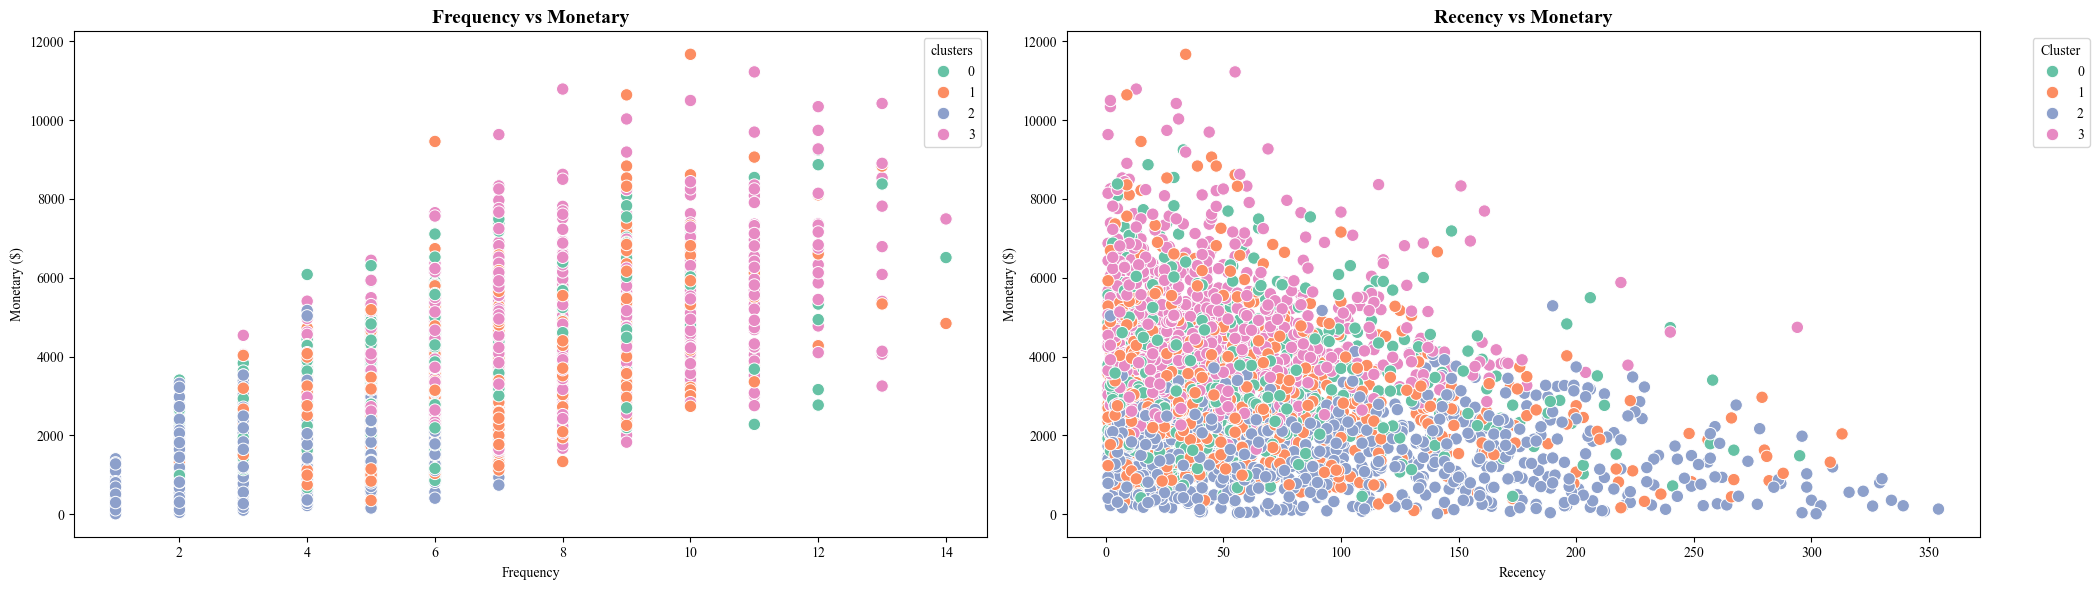

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Scatter plot 1: Frequency vs Monetary
sns.scatterplot(
    data=customerdata_merge,
    x='frequency',
    y='monetary',
    hue='clusters',
    palette='Set2',
    ax=axes[0],
    s=80  # k√≠ch th∆∞·ªõc ƒëi·ªÉm
)
axes[0].set_title('Frequency vs Monetary', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Monetary ($)')

# Scatter plot 2: Recency vs Monetary
sns.scatterplot(
    data=customerdata_merge,
    x='recency',
    y='monetary',
    hue='clusters',
    palette='Set2',
    ax=axes[1],
    s=80
)
axes[1].set_title('Recency vs Monetary', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Recency')
axes[1].set_ylabel('Monetary ($)')

# Canh ch·ªânh b·ªë c·ª•c v√† legend
plt.tight_layout()
axes[1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
